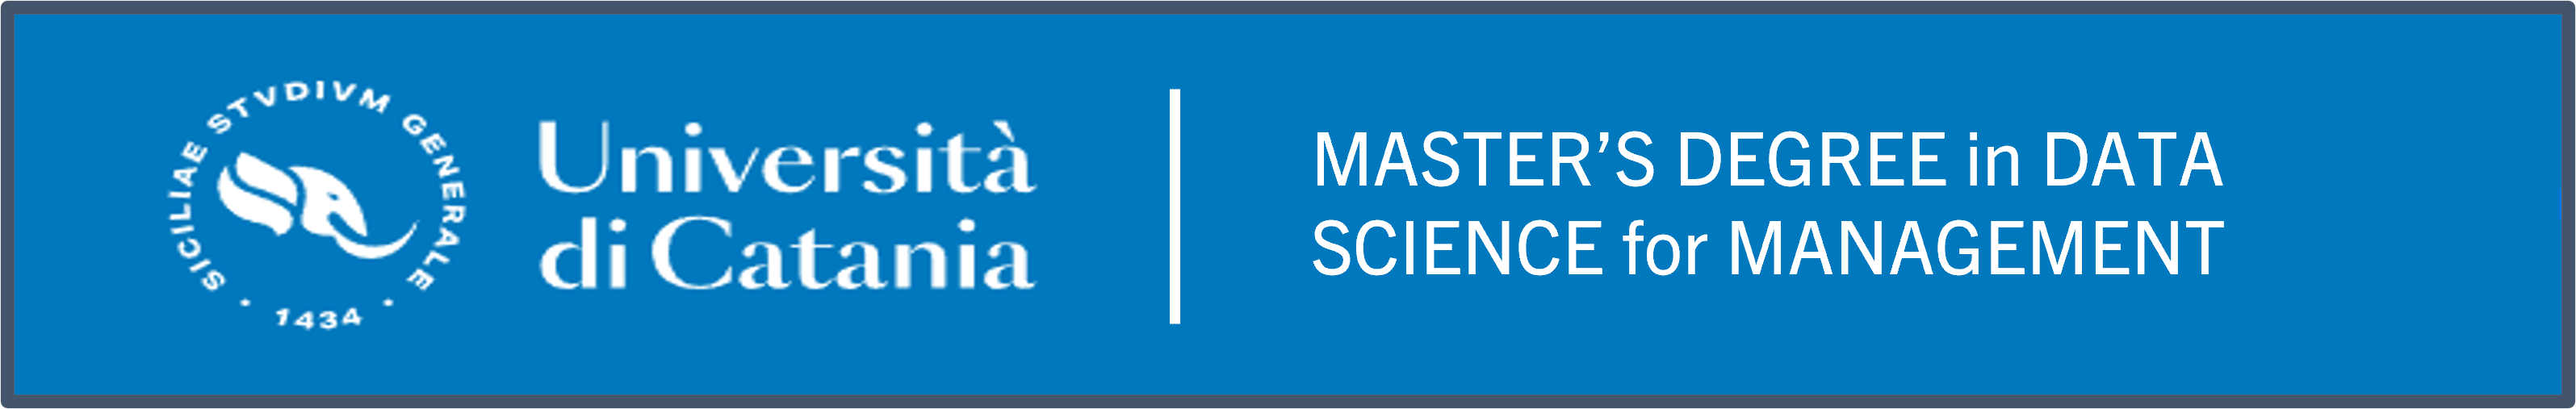

<font color=blue font face = "Verdana" size = "5">
<center><b>Leveraging Machine Learning Tools to estimate Solar Panel Installs<br></center>


<font color=blue font face = "Verdana" size = "5">
<center><b> using Google's Project SunRoof, US Census & Political Party Data</center>

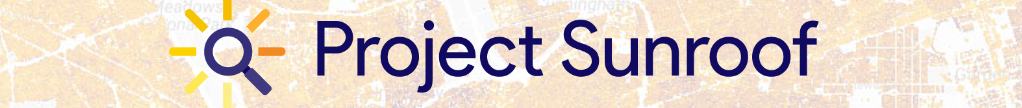

<font color=black font face = "Verdana" size = "4.5">
    <left><b>Prepared by: David Anthony Pagano & Manuela Lo Guidice</left><br>
    <left><b>Course: Advance Machine Learning and Statistical Analysis</left><br>
    <left><b>Professor: Vincenza Carchiolo</left>
<Hr width="99%">

## Index

### 1. Introduction
<font color=black font face = "Verdana" size = "2"> 1.1 Project Goals\
<font color=black font face = "Verdana" size = "2"> 1.2 Dataset
### 2. Exploratory data analysis (EDA)
<font color=black font face = "Verdana" size = "2">2.1 Cleaning our dataset\
<font color=black font face = "Verdana" size = "2">2.2 Univariate and Multivariate Analysis\
<font color=black font face = "Verdana" size = "2">2.3 Peparing our Data for Supervised Learning
### 3. Supervised Learning
<font color=black font face = "Verdana" size = "2">3.1 Logistic Regression\
<font color=black font face = "Verdana" size = "2">3.2 Linear Discrimant Analysis (LDA)\
<font color=black font face = "Verdana" size = "2">3.3 K-Nearest Neighbor (KNN)\
<font color=black font face = "Verdana" size = "2">3.4 Ridge Regressor\
<font color=black font face = "Verdana" size = "2">3.5 Stochastic Gradient Descent\
<font color=black font face = "Verdana" size = "2">3.6 Naive Bayes\
<font color=black font face = "Verdana" size = "2">3.7 Decision Tree & Random Forest\
<font color=black font face = "Verdana" size = "2">3.8 Support Vector Machine\
<font color=black font face = "Verdana" size = "2">3.9 XGBoost\
<font color=black font face = "Verdana" size = "2">3.10 LDA with Grid Search\
<font color=black font face = "Verdana" size = "2">3.11 SVC with Grid Search\
<font color=black font face = "Verdana" size = "2">3.12 Random Forest with Grid Search\
<font color=black font face = "Verdana" size = "2">3.13 XGBoost with Grid Search\
<font color=black font face = "Verdana" size = "2">3.14 Comparison of the models on Full Dataset\
<font color=black font face = "Verdana" size = "2">3.15 Random Forest with Grid Search and where outliers are capped\
<font color=black font face = "Verdana" size = "2">3.16 Random Forest with Grid Search on Most Important Features
### 4. Unsupervised Learning
<font color=black font face = "Verdana" size = "2">4.1 Principal Component Analysis (PCA)\
<font color=black font face = "Verdana" size = "2">4.2 Factor Analysis of Mixed Data (FAMD)\
<font color=black font face = "Verdana" size = "2">4.3 K-Means Clustering\
<font color=black font face = "Verdana" size = "2">4.4 K-Modes Clustering\
<font color=black font face = "Verdana" size = "2">4.5 Hiearchial Clustering
### 5. Semi-Supervised Learning
<font color=black font face = "Verdana" size = "2">5.1 Self-training\
<font color=black font face = "Verdana" size = "2">5.2 Logistic Regression with semi-supervised method
### 6. Conclusion

<font color=blue font face = "Verdana" size = "5">
<center><b>Introduction</b>

<font color=blue font face = "Verdana" size = "3"> Project Sunroof is a solar panel installation service that was developed by Google. It was launched in 2015 with the goal of making it easier for people to switch to solar energy by providing information and tools to help them determine whether their home is suitable for solar panels and how much they could save by installing them.
    
<font color=blue font face = "Verdana" size = "3"> To use Project Sunroof, homeowners enter their address into the Project Sunroof website or app at https://sunroof.withgoogle.com/, and the service uses Google Earth imagery and machine learning algorithms to analyze the roof and determine how much sunlight it receives throughout the year. Based on this analysis, Project Sunroof provides an estimate of how much a homeowner could save by switching to solar energy and how much it would cost to install a solar panel system. Project Sunroof also provides a list of solar panel installers in the area who can provide more detailed quotes and help homeowners through the process of installing solar panels. You can read more about Project Sunroof here: https://blog.google/products/maps/shedding-light-solar-potential-all-50-us-states/.


### 1.1 Solar Panel Prediction Project Goals:
The goal of the project will be to build a model that can predict if a United States Census block has any solar panels installed on buildings within the census block area by using Google’s Project Sunroof dataset combined with United States census demographic and political party data.  Both datasets can be found in Google Cloud's Public Datasets.
The analysis will evaluate several types of supervised learning approaches and models to determine which one provides the most accurate prediction of whether there is at least one install of solar panels within a given census block based on sunroof solar potential and census demographic data.  We will also leverage unsupervised learning methods to determine if there are any clear clusters of census blocks that have a higher amount of solar panel installs based on the sunroof potential and census demographic data.

### 1.2 Data Used in our Analysis:

<br><font color=blue font face = "Verdana" size = "3">PROJECT SUNROOF DATA USED IN OUR ANALYSIS:<br>
    
Note that the target variable in our project is the **"existing_install_count"** which we rename to current ** **"current_solar_panel_installs"**

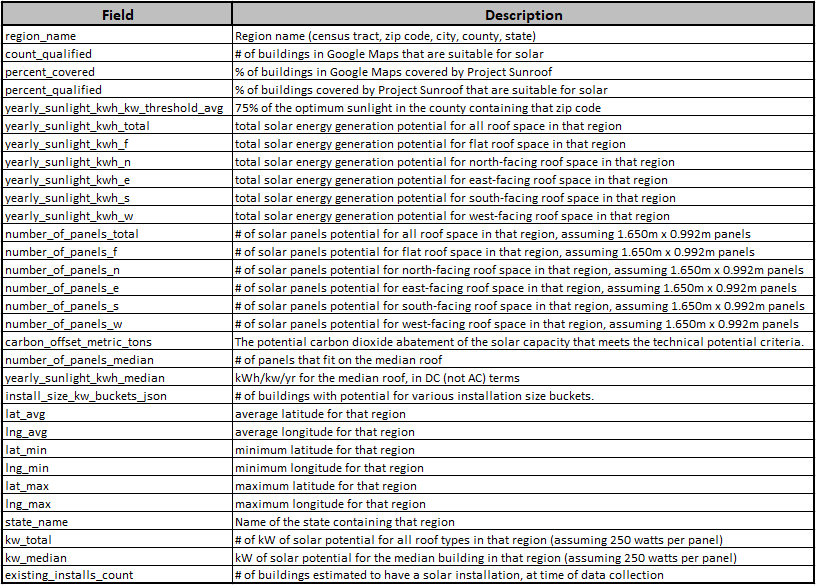

### United States Census Data
<br><font color=blue font face = "Verdana" size = "3">The US Census Bureau collects data on various aspects of the US population and economy. The data provided by the US Census Bureau includes, but is not limited to:
<br><font color=black font face = "Verdana" size = "2">
1) Demographic information: This includes information on age, gender, race, ethnicity, and household composition.<br>
2) Housing information: This includes information on housing units, occupancy, and housing characteristics such as age, size, and type of housing unit.<br>
3) Economic information: This includes information on income, poverty, employment, and industries.<br>
4) Social information: This includes information on education, health, disability, and veterans status.<br>
4) Geographic information: This includes information on states, countries, cities, and other geographic areas.<br>

### Percent Democratic Data
This file was manually created based on the information found at https://news.gallup.com/poll/226643/2017-party-affiliation-state.aspx and shows the percent of the population in each state that are Democrat/Lean Democratic in regards to thier Political party.


### Now we will load all the packages and functions that will be used in the Machine Learning Analysis

In [14]:
import time
Full_WB_start_time = time.time()
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
import matplotlib.pyplot as plt
import xgboost as xgb
import time
import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier as SGDc
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pylab
from pylab import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
#from prince import FAMD
import scipy.cluster.hierarchy as shc

#plt.style.use("ggplot")
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
#print(color.BOLD + 'Hello, World!' + color.END)

### Load the 3 datasets that will be used in the Machine Learning Model Analysis
* Google Project Sunroof United States Solar Panel Potential by US Census Tract Dataset Data
* 2018 United States Census Data
* 2017 Political Leaning Democrat for each State in the United States Data

In [15]:
solar_panel_data = pd.read_csv('bq-results-SolarPanel_CensusTract.csv', low_memory=True)
census_data = pd.read_csv('bq-results-2018_census_acs.csv', low_memory=False)
political_leaning_democrat_data = pd.read_csv('2017_Political_Leaning_Democrat.csv')

<font color=blue font face = "Verdana" size = "3">
<center><b>2. Exploratory data analysis (EDA)</b>

<font color=blue font face = "Verdana" size = "3">EDA involves using various visualization and statistical techniques to identify outliers, trends, relationships, and other insights in the data. The goal of EDA is to gain a better understanding of the data and prepare it for further analysis. During EDA, analysts may create visualizations such as histograms, scatterplots, and boxplots to understand the distribution of the data and identify potential outliers or unusual patterns. EDA can help data scientists to make informed decisions about what data cleaning, transformation, or modeling techniques to apply to the data. Ultimately, EDA is a vital step in the data analysis process, providing a foundation for more advanced statistical or machine learning techniques.  </b>

### Print the shape of each dataframe.  
* Note that the Solar Panel Potential Data has only 56940 Census tracts while the Census Data has 74001 Census tracts
* Note that the Percent Leaning Democrat Data has data for 50 states and not for Census tracts for US Territories

In [16]:
print('solar_panel_data shape:', solar_panel_data.shape)
print('census_data shape:', census_data.shape)
print('pld_data shape:', political_leaning_democrat_data.shape)

solar_panel_data shape: (56941, 33)
census_data shape: (74001, 242)
pld_data shape: (50, 2)


### 2.1 Cleaning our dataset

Cleaning your data is an essential and critical step in the machine learning process, as it can significantly affect the accuracy and reliability of your model's predictions. Machine learning algorithms rely heavily on the quality of the data they are trained on, and if the data is dirty, inconsistent, or contains errors, it can mislead the algorithm and lead to inaccurate predictions. Therefore, cleaning your data is essential to remove noise, outliers, inconsistencies, and other errors, leading to more accurate predictions, efficient processing, better feature selection, and more informative data visualization. By ensuring the quality of your data, you can build reliable and robust machine learning models that can provide valuable insights and drive informed decision-making.

### Show the number of duplicate rows in the solar_panel_data frame and the census_data dataframes
* Note that the Solar Panel Potential Data has 4351 rows where the region name is duplicated
* Note that the Census_Tract Data has no duplicated rows for the geo_id

In [17]:
solar_panel_region_duplicates = solar_panel_data.region_name.value_counts()
print(solar_panel_region_duplicates.value_counts())
print('')
census_data_geo_id_duplicates = census_data.geo_id.value_counts()
print(census_data_geo_id_duplicates.value_counts())

1    48237
2     4352
Name: region_name, dtype: int64

1    74001
Name: geo_id, dtype: int64


### Show the number of missing values in the dataframes
* Note that the Solar Panel Potential Data has 4 columns with > 4000 rows with missing values, these will be removed next to help address the issue with duplicate region names.
* Note that the Census data has 11 columns with over 20,000 missing values, these will be removed next before we join the dataframes
* Note that the Percent Leaning Democrat Data has zero missing values

In [18]:
missing = pd.DataFrame(solar_panel_data.isnull().sum(), columns=['solar_panel_data - Number of missing values'])
mask = missing['solar_panel_data - Number of missing values'] > 1
print(missing[mask].sort_values(by=["solar_panel_data - Number of missing values"], ascending=False))
print("")
missing = pd.DataFrame(census_data.isnull().sum(), columns=['census_data - Number of missing values'])
mask = missing['census_data - Number of missing values'] > 1000
print(missing[mask].sort_values(by=["census_data - Number of missing values"], ascending=False))
print("")
missing = pd.DataFrame(political_leaning_democrat_data.isnull().sum(), columns=['pld_data - Number of missing values'])
mask = missing['pld_data - Number of missing values'] > 1
print(missing[mask].sort_values(by=["pld_data - Number of missing values"], ascending=False))

                                      solar_panel_data - Number of missing values
number_of_panels_total                                                       4372
kw_total                                                                     4372
yearly_sunlight_kwh_total                                                    4372
yearly_sunlight_kwh_kw_threshold_avg                                         4349
number_of_panels_median                                                        26
kw_median                                                                      26
yearly_sunlight_kwh_median                                                     26
install_size_kw_buckets                                                        26
is in ctd                                                                       9

                                                    census_data - Number of missing values
pop_5_years_over                                                                     740

### Dropping the rows that have Null Values in the solar_panel dataframe and removing duplicate rows for region

In [19]:
solar_panel_data = solar_panel_data.dropna()
print("Does the dataframe have any Null Values:", solar_panel_data.isnull().values.any())
print('')
solar_panel_region_duplicates = solar_panel_data.region_name.value_counts()
print(solar_panel_region_duplicates.value_counts())
print('')
solar_panel_data = solar_panel_data.loc[~solar_panel_data.region_name.duplicated(keep='first')]
solar_panel_region_duplicates = solar_panel_data.region_name.value_counts()
print(solar_panel_region_duplicates.value_counts())
print('Is the region now unique in the dataframe:', solar_panel_data.region_name.is_unique)

Does the dataframe have any Null Values: False

1    52551
2        5
Name: region_name, dtype: int64

1    52556
Name: region_name, dtype: int64
Is the region now unique in the dataframe: True


### Removing the location latatude and Longitude and the 'is in ctd', 'install_size_kw_buckets' fields from the Solar Panel Data

In [20]:
solar_panel_data = solar_panel_data.drop(columns=['is in ctd','lat_max','lat_min','lng_max','lng_min','lat_avg','lng_avg',
                                                 'install_size_kw_buckets', 'center_point'])

### Removing 11 columns that have over 20,000 missing values and the 'do date' field from the Census Data

In [21]:
census_data = census_data.drop(columns=['do_date', 'pop_5_years_over','pop_divorced','speak_spanish_at_home',
'speak_only_english_at_home','pop_15_and_over','speak_spanish_at_home_low_english','pop_widowed', 
'pop_separated','pop_now_married','pop_never_married','aggregate_travel_time_to_work', 'management_business_sci_arts_employed',
'sales_office_employed','occupied_housing_units', 'hispanic_any_race'])

### Show all remaining columns in the 3 dataframes

In [22]:
sp_cols = list(solar_panel_data.columns.values)
print(color.UNDERLINE + 'List of Solar Panel Potential Columns:' + color.END)
print("")
print(sp_cols)
print("")
cd_cols = list(census_data.columns.values)
print(color.UNDERLINE + 'List of Census Data Columns:' + color.END)
print("")
print(cd_cols)
print("")
pld_cols = list(political_leaning_democrat_data.columns.values)
print(color.UNDERLINE + 'List of Democratic Leaning by State Data:' + color.END)
print("")
print(pld_cols)
print("")

List of Solar Panel Potential Columns:

['region_name', 'state_name', 'yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified', 'percent_covered', 'percent_qualified', 'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median', 'number_of_panels_total', 'kw_median', 'kw_total', 'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w', 'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'existing_installs_count']

List of Census Data Columns:

['geo_id', 'total_pop', 'households', 'male_pop', 'female_pop', 'median_age', 'male_under_5', 'male_5_to_9', 'male_10_to_14', 'male_15_to_17', 'male_18_to_19', 'male_20', 'male_21', 'male_22_to_24', 'male_25_to_29', 'male_30_to_34', 'male_35_to_39', 'male_40_to_44', 'male_45_to_49', 'male_50_to_54', 'male_55_to_59', 'male_60_to_61', 'male_62_to_64', 'male_65_to_66', 'ma

### Next we will join the 3 dataframes into 1, renaming the 'region_name' field to be "Census_tract" and setting this field as the dataframe index.  Then we will print the first 5 rows of the combined dataframe. 
* Note that the Solar Panel Data is merged with the Census Data based on 'region_name'/'geo_id'
* Note that the data is then joined with the Percent Leaning Democrat based on the 'state_name'/'State'

In [23]:
joined_data = solar_panel_data.merge(census_data, how='inner', left_on='region_name', right_on='geo_id')
joined_data = joined_data.merge(political_leaning_democrat_data, how='inner', left_on='state_name', right_on='State')
joined_data.drop(['geo_id', 'state_name', 'State'], inplace=True, axis=1)
joined_data.rename(columns = {'region_name':'census_tract'}, inplace = True)
joined_data = joined_data.set_index(['census_tract'])
joined_data.head()

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem
census_tract,,,,,,,,,,,,,,,,,,,,,
1001020100,1095.65,591.0,103.360215,76.853056,2359.0,11278.0,8364.0,9206.0,7873.0,48.0,...,103.0,154.0,183.0,170.0,85,85,137,470,93,35
1001020200,1095.65,718.0,104.472843,73.190622,4749.0,14020.0,9734.0,9904.0,20647.0,44.0,...,33.0,141.0,182.0,192.0,100,88,107,467,70,35
1001020300,1095.65,1121.0,101.278409,78.611501,7066.0,22037.0,12978.0,13539.0,24744.0,41.0,...,166.0,236.0,502.0,280.0,434,100,134,851,48,35
1001020400,1095.65,1491.0,101.384451,78.308824,9989.0,30616.0,18320.0,20931.0,14742.0,54.0,...,172.0,330.0,355.0,212.0,156,133,134,683,115,35
1001020500,1095.65,3378.0,100.232491,97.941432,15132.0,84319.0,54611.0,61481.0,61382.0,54.0,...,140.0,486.0,1042.0,584.0,600,502,555,2354,158,35


### Rechecking the number of missing values in the joined dataframe

In [24]:
jds = joined_data.shape
print('joined data shape:', jds)
missing = pd.DataFrame(joined_data.isnull().sum(), columns=['Number of missing values'])
mask = missing['Number of missing values'] > 100
print(missing[mask].sort_values(by=["Number of missing values"], ascending=False))

joined data shape: (51990, 248)
                                                    Number of missing values
owner_occupied_housing_units_lower_value_quartile                       1903
median_rent                                                             1386
owner_occupied_housing_units_upper_value_quartile                       1348
owner_occupied_housing_units_median_value                               1340
renter_occupied_housing_units_paying_cash_media...                      1303
percent_income_spent_on_rent                                             985
median_year_structure_built                                              835
median_income                                                            490
gini_index                                                               415
income_per_capita                                                        268
median_age                                                               255


### Dropping NaN Values from the dataframe which reduces rows from 51,990 to 48,235

In [25]:
joined_data=joined_data.dropna()
jds1 = joined_data.shape
print('joined data shape:', jds1)
print("Does the dataframe have any Null Values:", joined_data.isnull().values.any())

joined data shape: (48235, 248)
Does the dataframe have any Null Values: False


### Checking for Outliers
As shown below, it is apparent that many of our input variable have a high amount of outliers, since we are using such a large dataset, our strategy is to not address these outliers now but what we will do is, toward the end of our analysis, cap the outliers and run a model to see if that would improve our prefered models performance.

In [26]:
Q1 = joined_data.quantile(0.25)
Q3 = joined_data.quantile(0.75)
IQR = Q3 - Q1

number_of_outliers = ((joined_data < (Q1 - 1.5 * IQR)) | (joined_data > (Q3 + 1.5 * IQR))).sum()
number_of_outliers = pd.DataFrame(number_of_outliers, columns = ['Num_of_Outliers'])

number_of_outliers_sorted = number_of_outliers.sort_values(by=["Num_of_Outliers"], ascending=False)
print(number_of_outliers_sorted.head(20))

                                                    Num_of_Outliers
percent_covered                                               12935
commuters_by_subway_or_elevated                               11370
female_female_households                                      10590
armed_forces                                                  10190
male_male_households                                          10024
two_parents_mother_in_labor_force_families_with...             9358
mobile_homes                                                   8379
million_dollar_housing_units                                   7636
existing_installs_count                                        7256
other_race_pop                                                 7158
group_quarters                                                 6325
amerindian_pop                                                 6111
housing_built_2005_or_later                                    5879
asian_male_55_64                                

### Shuffle the data using .sample(frac=1))

In [27]:
joined_data = joined_data.sample(frac = 1, random_state=99)
joined_data.head()

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem
census_tract,,,,,,,,,,,,,,,,,,,,,
22073001400,1075.25,595.0,100.412371,61.088296,3756.0,10568.0,5212.0,5789.0,43782.0,37.0,...,47.0,124.0,136.0,195.0,143,206,218,677,42,40
51107611006,1056.55,11.0,1.123596,91.666667,46.0,421.0,626.0,220.0,9091.0,135.0,...,24.0,59.0,623.0,384.0,361,470,466,1939,267,45
42091206600,994.50,294.0,103.598972,72.952854,1041.0,3943.0,3317.0,3487.0,4673.0,24.0,...,72.0,74.0,197.0,128.0,92,58,53,352,68,46
19103000400,986.85,1041.0,124.780702,91.476274,4513.0,20093.0,14217.0,17639.0,43579.0,40.0,...,96.0,273.0,507.0,581.0,423,419,388,3001,1098,42
48439111516,1146.65,1485.0,98.773909,73.733863,3583.0,19596.0,3467.0,9184.0,51300.0,22.0,...,214.0,785.0,1050.0,882.0,547,428,577,2451,638,38


### 2.2 Univeriate and Multivariate Analysis

### Change existing_installs_count to be "current_solar_panel_installs" and to have the below 2 categories for our predict value:
1. "0" - for census tracts with zero current solar panel installs per the google project sunroof data
2. "1" - for census tracts with at least one solar panel install per the google project sunroof data

In [28]:
jd_all = joined_data.copy()
jd_all['current_solar_panel_installs'] = np.where((joined_data['existing_installs_count']<= 0), 0, 1)
jd_all = jd_all.drop('existing_installs_count', axis=1)

### Show Histogram of 'Existing_installs_count', which is the number of Solar Panels installed in the given census block and will represent our target variable for our follow on supervised  machine learning models.

<AxesSubplot:>

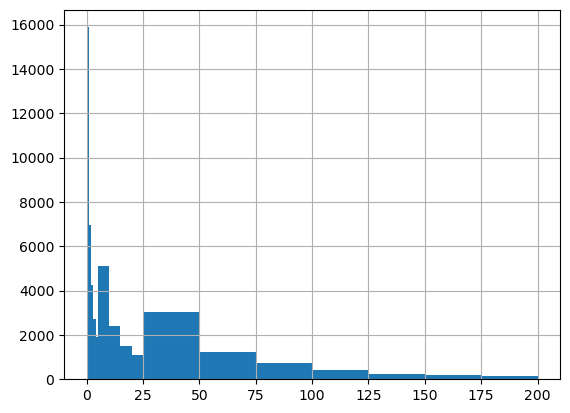

In [29]:
joined_data.existing_installs_count.hist(bins=[0,1,2,3,4,5,10,15,20,25,50,75,100,125,150,175,200])

The resulting histogram will show the frequency distribution of the number of existing solar panel installations across the locations in the joined_data DataFrame, with the x-axis representing the bin ranges and the y-axis representing the frequency of observations falling into each bin.

Bins (commonly used in histograms) are the range of values for a variable divided into a fixed number of equally sized bins, and the number of observations that fall into each bin is represented by the height or frequency of the bars. 
The bin width can affect the visual interpretation of the histogram, as smaller bins can show more detail in the distribution, while larger bins can result in a smoother distribution.

### Continuos variables

Let’s see the general outlook of the continuos variables.

In [30]:
jd_all.describe(include = [np.number]) #numerical variables

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem,current_solar_panel_installs
count,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,4.823500e+04,48235.000000,...,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000,48235.000000
mean,1088.988186,1109.039681,103.690989,83.219703,5054.744522,19029.588660,12467.471338,15018.731046,3.700298e+04,44.306230,...,278.246647,507.323603,401.325739,234.967264,238.090785,244.186669,1189.900114,272.308573,44.921323,0.670861
std,141.079302,748.005935,232.423291,12.935938,6660.565966,16757.495066,11984.251048,14561.143150,5.966635e+04,57.862015,...,204.209086,303.690807,248.928894,181.576900,183.706581,182.234064,802.237412,378.017849,6.024749,0.469905
min,687.650000,1.000000,0.027503,10.081466,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000
25%,984.300000,608.000000,98.659261,75.828503,777.000000,8082.000000,4498.000000,5529.000000,9.603500e+03,29.000000,...,132.000000,301.000000,230.000000,120.000000,119.000000,123.000000,688.000000,117.000000,41.000000,0.000000
50%,1063.350000,1000.000000,99.686028,85.531629,2717.000000,15353.000000,9669.000000,11595.000000,2.032400e+04,39.000000,...,233.000000,456.000000,353.000000,198.000000,200.000000,207.000000,1035.000000,196.000000,45.000000,1.000000
75%,1156.850000,1464.000000,100.388770,93.554884,6890.000000,25564.000000,16894.500000,20266.500000,4.201250e+04,52.000000,...,373.000000,646.000000,514.000000,302.000000,310.000000,321.000000,1480.000000,312.000000,51.000000,1.000000
max,1437.350000,22503.000000,36614.285710,100.000000,270688.000000,502293.000000,453392.000000,506894.000000,2.484407e+06,7813.000000,...,2482.000000,5860.000000,3774.000000,6342.000000,6336.000000,5115.000000,26045.000000,13275.000000,57.000000,1.000000


### Show histogram of each numeric features

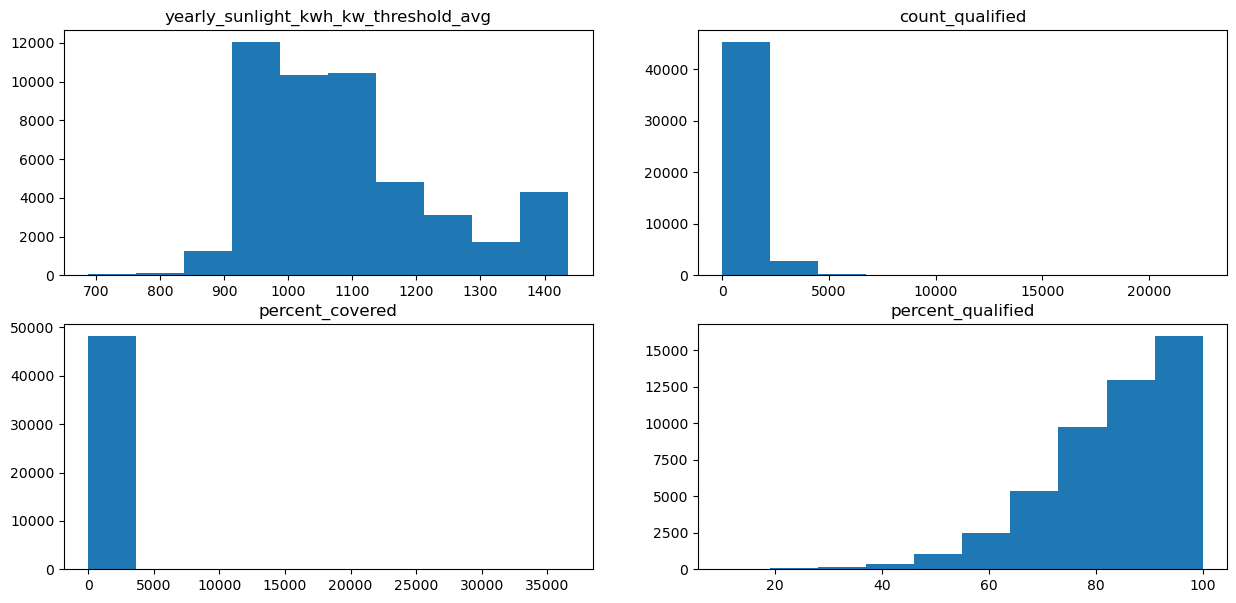

In [31]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=2,figsize=(15,7))
ax[0][0].hist(jd_all.loc[:,"yearly_sunlight_kwh_kw_threshold_avg"])
ax[0][0].set_title("yearly_sunlight_kwh_kw_threshold_avg")
ax[0][1].hist(jd_all.loc[:,"count_qualified"])
ax[0][1].set_title("count_qualified")

ax[1][0].hist(jd_all.loc[:,"percent_covered"])
ax[1][0].set_title("percent_covered")
ax[1][1].hist(jd_all.loc[:,"percent_qualified"])
ax[1][1].set_title("percent_qualified")

plt.show()

* **yearly_sunlight_kwh_kw_threshold_avg**: This histogram is skewed to the left, with a long tail on the right side of the peak around 1400.
* **count_qualified**: we have a very high rightly-skewed distribution since at least the 75% of the
data are equal to 0.
* **percent_covered**: we have a very high rightly-skewed distribution since at least the 100% of the
data are equal to 0.
* **percent_qualified**: This histogram is skewed to the left, which increases from 20 to 100.

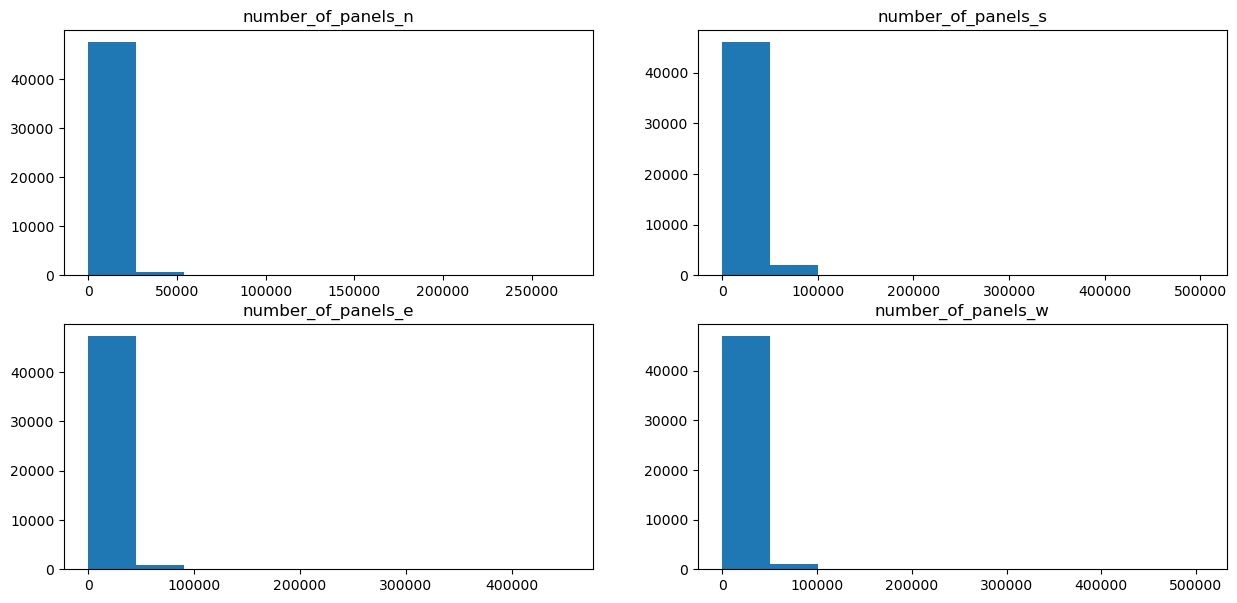

In [32]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=2,figsize=(15,7))
ax[0][0].hist(jd_all.loc[:,"number_of_panels_n"])
ax[0][0].set_title("number_of_panels_n")
ax[0][1].hist(jd_all.loc[:,"number_of_panels_s"])
ax[0][1].set_title("number_of_panels_s")

ax[1][0].hist(jd_all.loc[:,"number_of_panels_e"])
ax[1][0].set_title("number_of_panels_e")
ax[1][1].hist(jd_all.loc[:,"number_of_panels_w"])
ax[1][1].set_title("number_of_panels_w")

plt.show()

For **number_of_panels_n, number_of_panels_s, number_of_panels_e, number_of_panels_w** have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.

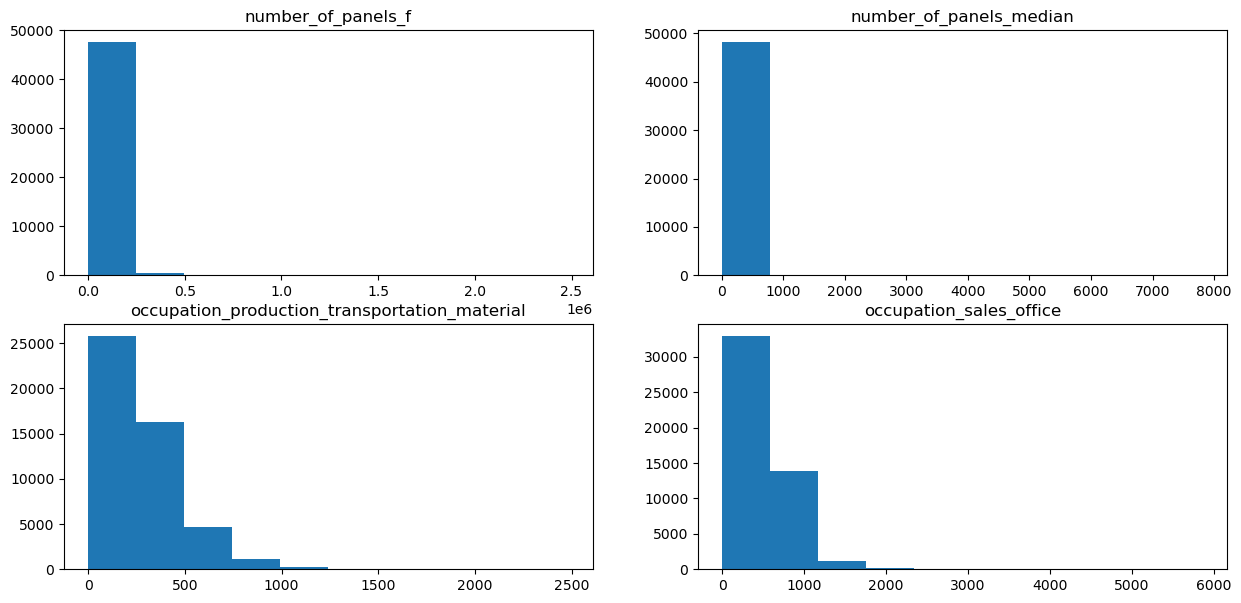

In [33]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=2,figsize=(15,7))
ax[0][0].hist(jd_all.loc[:,"number_of_panels_f"])
ax[0][0].set_title("number_of_panels_f")
ax[0][1].hist(jd_all.loc[:,"number_of_panels_median"])
ax[0][1].set_title("number_of_panels_median")

ax[1][0].hist(jd_all.loc[:,"occupation_production_transportation_material"])
ax[1][0].set_title("occupation_production_transportation_material")
ax[1][1].hist(jd_all.loc[:,"occupation_sales_office"])
ax[1][1].set_title("occupation_sales_office")

plt.show()

* **number_of_panels_f**: have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.
* **number_of_panels_median**: we have a very high rightly-skewed distribution since at least the 100% of the data are equal to 0.
* **occupation_production_transportation_material**:This histogram is skewed to the right, which decrease from 1250 to 0.
* **occupation_sales_office**:This histogram is skewed to the right, which decrease from 2200 to 0.

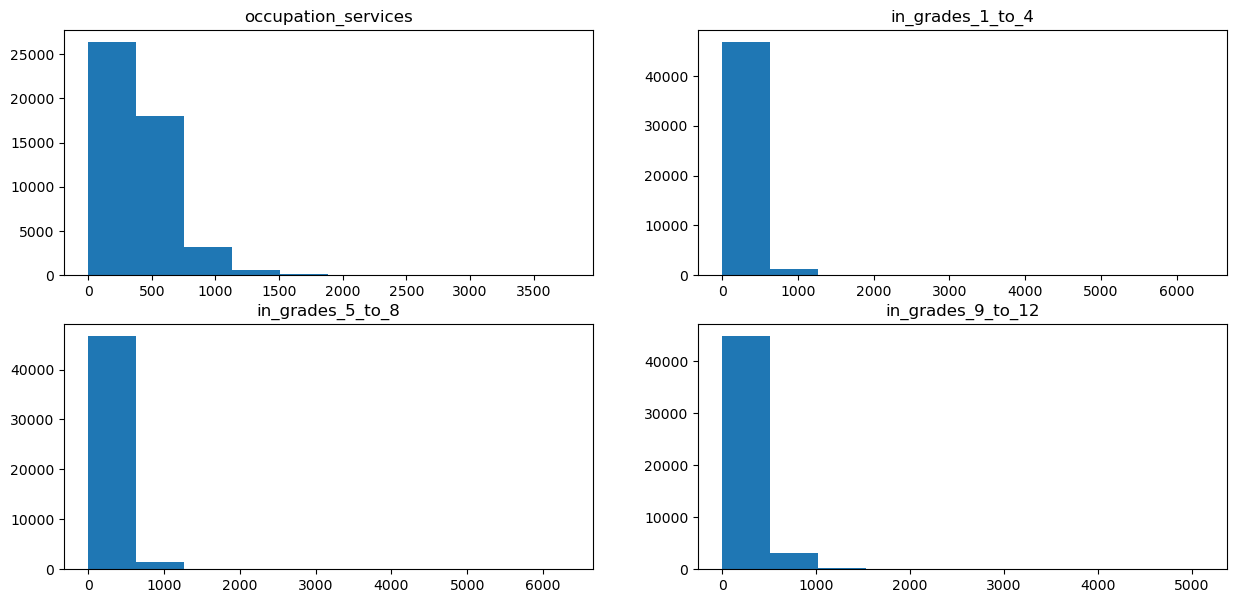

In [34]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=2,figsize=(15,7))
ax[0][0].hist(jd_all.loc[:,"occupation_services"])
ax[0][0].set_title("occupation_services")
ax[0][1].hist(jd_all.loc[:,"in_grades_1_to_4"])
ax[0][1].set_title("in_grades_1_to_4")

ax[1][0].hist(jd_all.loc[:,"in_grades_5_to_8"])
ax[1][0].set_title("in_grades_5_to_8")
ax[1][1].hist(jd_all.loc[:,"in_grades_9_to_12"])
ax[1][1].set_title("in_grades_9_to_12")

plt.show()

* **occupation_services**:This histogram is skewed to the right, which decrease from 1900 to 0.
* **in_grades_1_to_4**: have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.
* **in_grades_5_to_8**:have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.
* **in_grades_9_to_12**:have a very high rightly-skewed distribution since at least the 80% of the data are equal to 0.

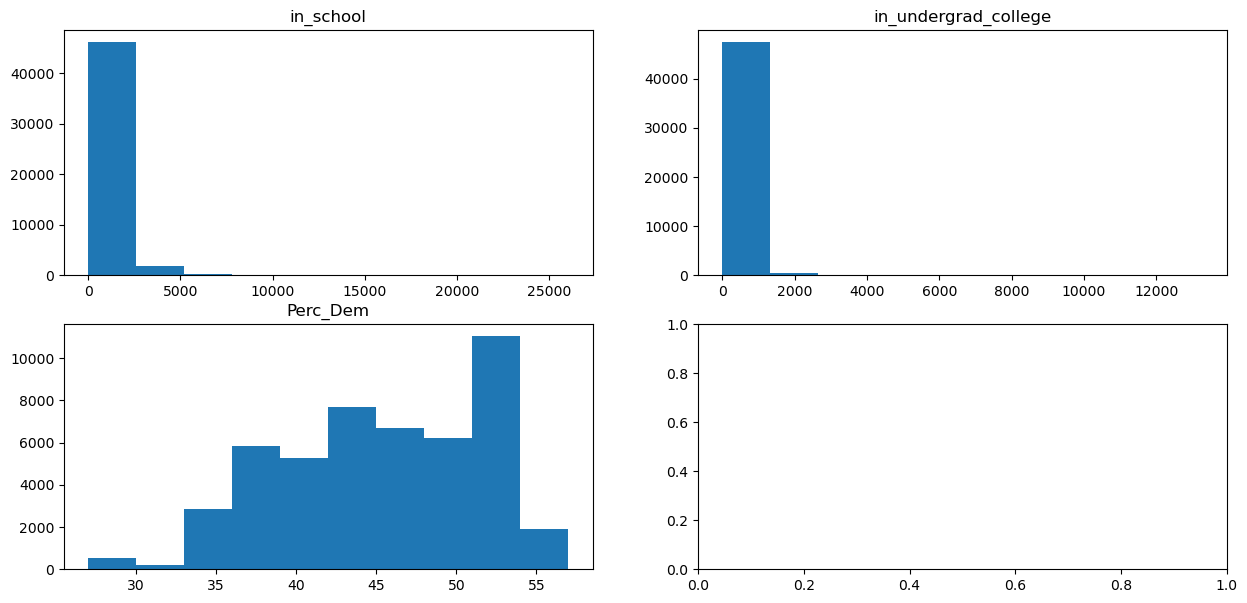

In [38]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=2,figsize=(15,7))
ax[0][0].hist(jd_all.loc[:,"in_school"])
ax[0][0].set_title("in_school")
ax[0][1].hist(jd_all.loc[:,"in_undergrad_college"])
ax[0][1].set_title("in_undergrad_college")

ax[1][0].hist(jd_all.loc[:,"Perc_Dem"])
ax[1][0].set_title("Perc_Dem")

plt.show()

* **in_school**:have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.
* **in_undergrad_college**:have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0.
* **Perc_Dem**: This histogram is skewed to the left, with a long tail on the right side of the peak around 53 perc_dem.
* **current_solar_panel_installs**:This histogram has two peak, a shorter one in 0 and a longer one in 1. This is the distribution of people who installs current solar panel and not.

### Correlation matrix

Let’s analyze the correlations between the variables.

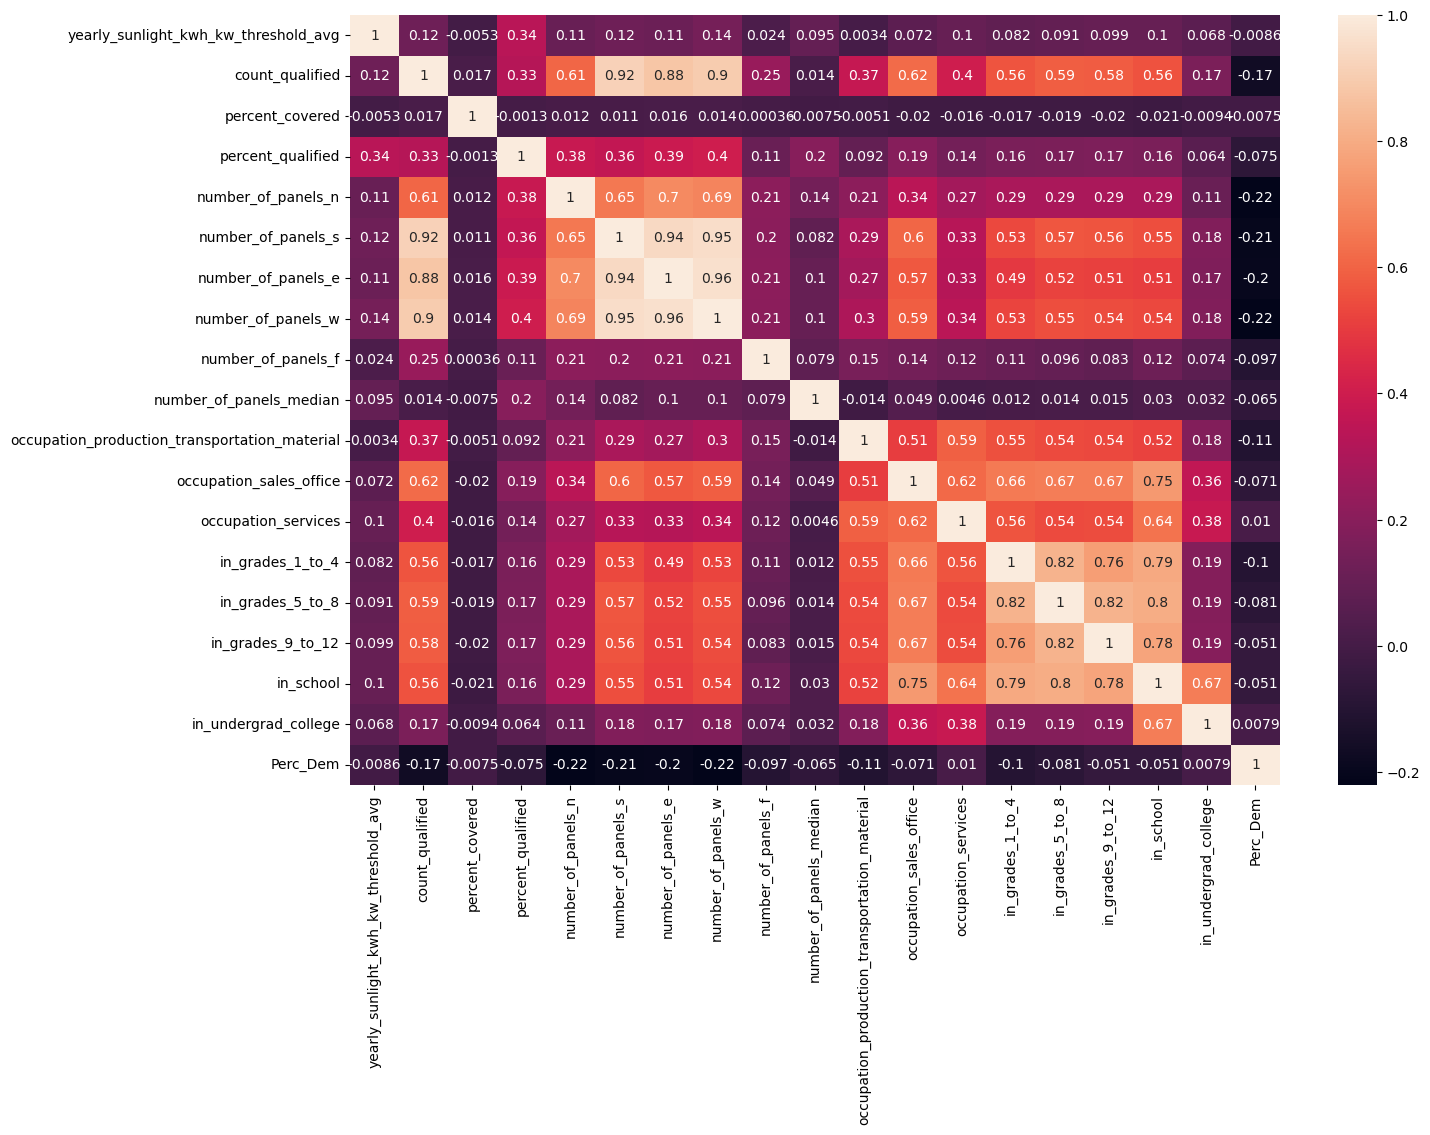

In [37]:
from matplotlib.pyplot import figure

# Select the subset of variables you are interested in
subset = jd_all[['yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified', 'percent_covered','percent_qualified','number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w','number_of_panels_f', 'number_of_panels_median','occupation_production_transportation_material', 'occupation_sales_office','occupation_services', 'in_grades_1_to_4', 'in_grades_5_to_8', 'in_grades_9_to_12','in_school', 'in_undergrad_college', 'Perc_Dem']]

df_corr = jd_all.drop('current_solar_panel_installs', axis=1) 
#we remove the target variable, because we are interested in knowing the correlation between the other 
#independent variables in the dataset, as they could help us predict the value of the target variable.
corr_matrix = subset.corr() #to calculate the correlation matrix
figure(figsize = (15,10))
sns.heatmap(corr_matrix, annot=True) 
#to plot the matrix with the annot=True parameter to show the numerical values of the correlations 
#in each cell of the heatmap.
plt.show()

We can see that some variables had an high correlation such as number_of_panels_e and number_of_panels_w with a score equal to 0.96, and other variable that have a low correlation such as in_school and percent_qualified with a score equal to 0.16.

### Box plot of each features

The boxplots provide a visual summary of the distribution of each variable, and can help us identify potential outliers or skewness in the data.

Boxplots are a way to visualize the distribution of a dataset through their quartiles.\
The box represents the interquartile range (IQR), which is the range between the first and third quartiles (25th and 75th percentile), while the median is represented by the line inside the box.\
The whiskers extend from the box to the maximum and minimum values that are not considered outliers, which are represented by points beyond the whiskers.

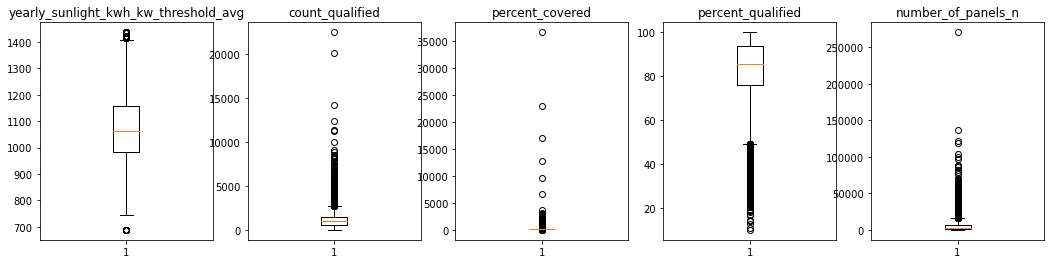

In [91]:
fig, ax = plt.subplots(nrows = 1, ncols=5,figsize=(18,4))
ax[0].boxplot(jd_all.loc[:,"yearly_sunlight_kwh_kw_threshold_avg"])
ax[0].set_title("yearly_sunlight_kwh_kw_threshold_avg")
ax[1].boxplot(jd_all.loc[:,"count_qualified"])
ax[1].set_title("count_qualified")
ax[2].boxplot(jd_all.loc[:,"percent_covered"])
ax[2].set_title("percent_covered")
ax[3].boxplot(jd_all.loc[:,"percent_qualified"])
ax[3].set_title("percent_qualified")
ax[4].boxplot(jd_all.loc[:,"number_of_panels_n"])
ax[4].set_title("number_of_panels_n")


plt.show()

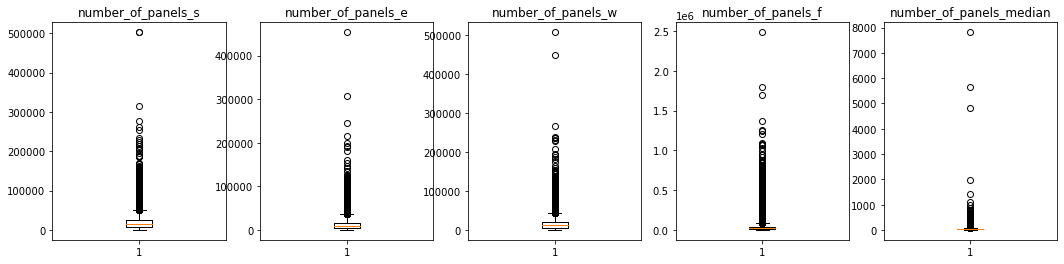

In [92]:
fig, ax = plt.subplots(nrows = 1, ncols=5,figsize=(18,4))
ax[0].boxplot(jd_all.loc[:,"number_of_panels_s"])
ax[0].set_title("number_of_panels_s")
ax[1].boxplot(jd_all.loc[:,"number_of_panels_e"])
ax[1].set_title("number_of_panels_e")
ax[2].boxplot(jd_all.loc[:,"number_of_panels_w"])
ax[2].set_title("number_of_panels_w")
ax[3].boxplot(jd_all.loc[:,"number_of_panels_f"])
ax[3].set_title("number_of_panels_f")
ax[4].boxplot(jd_all.loc[:,"number_of_panels_median"])
ax[4].set_title("number_of_panels_median")


plt.show()

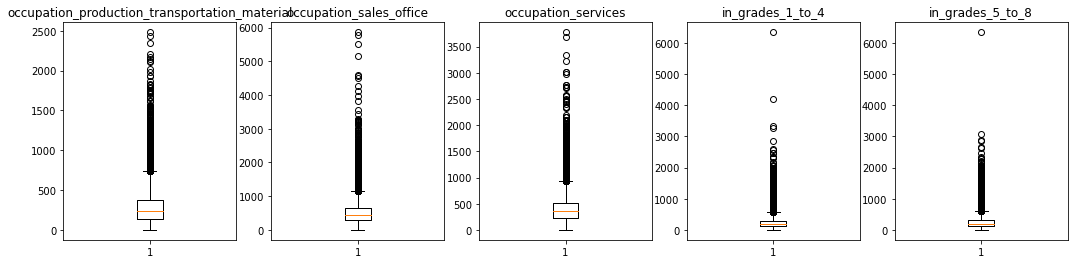

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols=5,figsize=(18,4))
ax[0].boxplot(jd_all.loc[:,"occupation_production_transportation_material"])
ax[0].set_title("occupation_production_transportation_material")
ax[1].boxplot(jd_all.loc[:,"occupation_sales_office"])
ax[1].set_title("occupation_sales_office")
ax[2].boxplot(jd_all.loc[:,"occupation_services"])
ax[2].set_title("occupation_services")
ax[3].boxplot(jd_all.loc[:,"in_grades_1_to_4"])
ax[3].set_title("in_grades_1_to_4")
ax[4].boxplot(jd_all.loc[:,"in_grades_5_to_8"])
ax[4].set_title("in_grades_5_to_8")


plt.show()

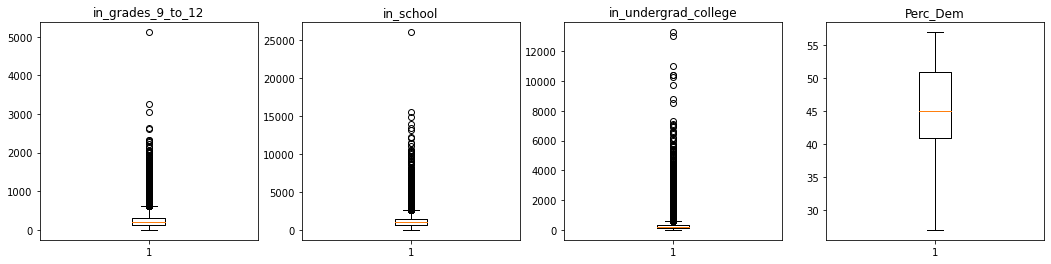

In [97]:
fig, ax = plt.subplots(nrows = 1, ncols=4,figsize=(18,4))
ax[0].boxplot(jd_all.loc[:,"in_grades_9_to_12"])
ax[0].set_title("in_grades_9_to_12")
ax[1].boxplot(jd_all.loc[:,"in_school"])
ax[1].set_title("in_school")
ax[2].boxplot(jd_all.loc[:,"in_undergrad_college"])
ax[2].set_title("in_undergrad_college")
ax[3].boxplot(jd_all.loc[:,"Perc_Dem"])
ax[3].set_title("Perc_Dem")

plt.show()

There is a strong presence of outliers in the dataset.\
However, we will remove outliers only with the best supervised learning model to see if the model performance improves.\
We see that variables such as percent_covered and number_of_panels_median have the quartiles and the median associated to 0. It seems that they can be removed from our analysis since their values are not so relevant.

### Let’s dive in depth a bit, performing a bivariate analysis in which we consider each independent variable with respect the target variable current_solar_panel_installs.

Bivariate analysis can be used to study the effect of one variable on another variable, and it can also be used to predict the values of one variable based on the values of the other variable.\
Box plots are useful in bivariate analysis because they allow us to compare the distribution of the variable on the y-axis across different values of the variable on the x-axis.\
This can help us to identify any patterns or trends in the data, such as whether there is a significant difference in the distribution of the variable on the y-axis between different groups defined by the variable on the x-axis.

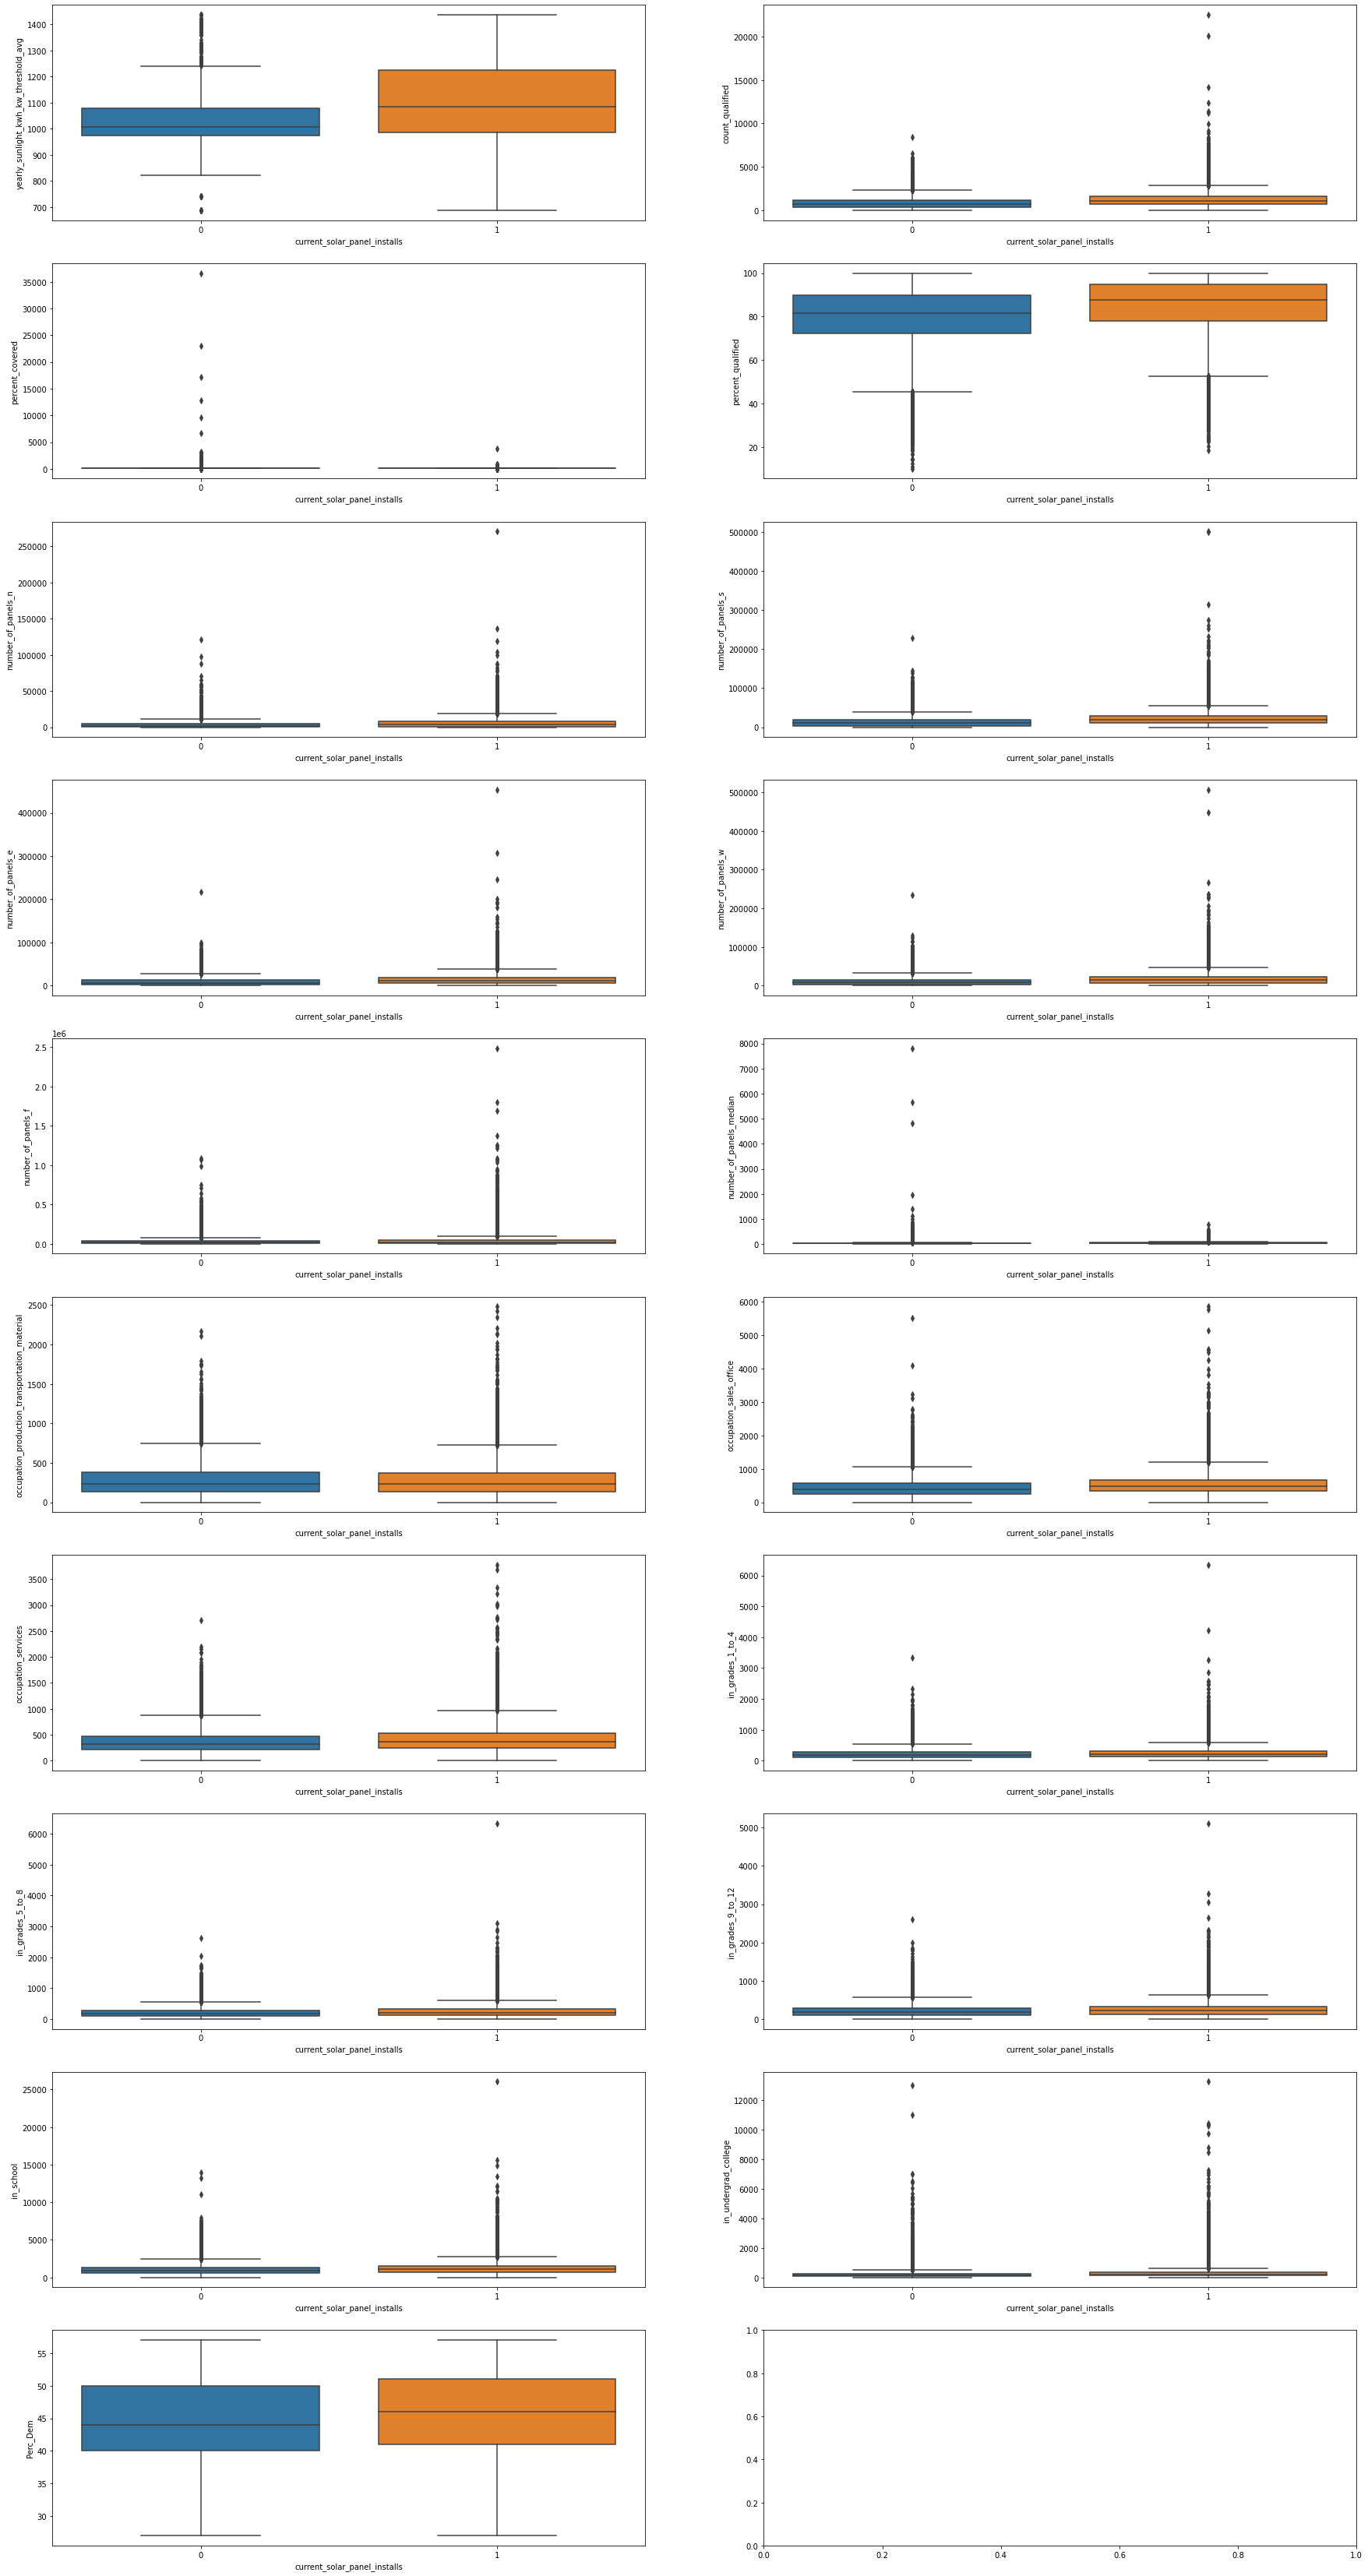

In [99]:
fig, ax = plt.subplots(nrows = 10, ncols=2,figsize=(30,60))
sns.boxplot(ax = ax[0,0], x= jd_all["current_solar_panel_installs"], y=jd_all["yearly_sunlight_kwh_kw_threshold_avg"])
sns.boxplot(ax = ax[0,1], x= jd_all["current_solar_panel_installs"], y=jd_all["count_qualified"])
sns.boxplot(ax = ax[1,0], x= jd_all["current_solar_panel_installs"], y=jd_all["percent_covered"])
sns.boxplot(ax = ax[1,1], x= jd_all["current_solar_panel_installs"], y=jd_all["percent_qualified"])
sns.boxplot(ax = ax[2,0], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_n"])
sns.boxplot(ax = ax[2,1], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_s"])

sns.boxplot(ax = ax[3,0], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_e"])
sns.boxplot(ax = ax[3,1], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_w"])
sns.boxplot(ax = ax[4,0], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_f"])
sns.boxplot(ax = ax[4,1], x= jd_all["current_solar_panel_installs"], y=jd_all["number_of_panels_median"])
sns.boxplot(ax = ax[5,0], x= jd_all["current_solar_panel_installs"], y=jd_all["occupation_production_transportation_material"])
sns.boxplot(ax = ax[5,1], x= jd_all["current_solar_panel_installs"], y=jd_all["occupation_sales_office"])

sns.boxplot(ax = ax[6,0], x= jd_all["current_solar_panel_installs"], y=jd_all["occupation_services"])
sns.boxplot(ax = ax[6,1], x= jd_all["current_solar_panel_installs"], y=jd_all["in_grades_1_to_4"])
sns.boxplot(ax = ax[7,0], x= jd_all["current_solar_panel_installs"], y=jd_all["in_grades_5_to_8"])
sns.boxplot(ax = ax[7,1], x= jd_all["current_solar_panel_installs"], y=jd_all["in_grades_9_to_12"])
sns.boxplot(ax = ax[8,0], x= jd_all["current_solar_panel_installs"], y=jd_all["in_school"])
sns.boxplot(ax = ax[8,1], x= jd_all["current_solar_panel_installs"], y=jd_all["in_undergrad_college"])

sns.boxplot(ax = ax[9,0], x= jd_all["current_solar_panel_installs"], y=jd_all["Perc_Dem"])

#The sns.boxplot function plots two boxplots side by side for each level of a variable. 
#The first boxplot represents the distribution of the values for the first group, 
#and the second boxplot represents the distribution of the values for the second group.

plt.show()

### 2.3 Preparing our data for Supervised Learning 

To prepare our data for Supervised Learning we will perform the following tasks:
* Normalize our data set
* Balance our data set
* Split the data set into training, validation and test sets.

### Show histogram of Solar Panel Installs - Graphs shows 15,878 or 32.91% of the census tracts have No Solar Panels while 32,359 or 67.09% have at least one Solar Panel installed.

Number of tracts with No solar panels count: 15876 (32.91%)
Number of tracts with Some solar panels count: 32359 (67.09%)


<AxesSubplot:>

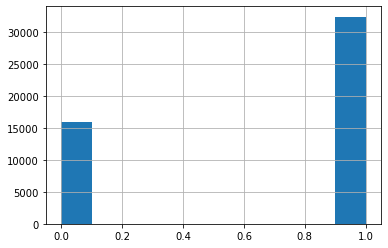

In [17]:
n_No_SP = len(jd_all.loc[jd_all['current_solar_panel_installs'] == 0])
n_Some_SP = len(jd_all.loc[jd_all['current_solar_panel_installs'] == 1])
print("Number of tracts with No solar panels count: {0} ({1:2.2f}%)".format(n_No_SP, (n_No_SP / (n_No_SP + n_Some_SP)) * 100 ))
print("Number of tracts with Some solar panels count: {0} ({1:2.2f}%)".format(n_Some_SP, (n_Some_SP / (n_No_SP + n_Some_SP)) * 100))

jd_all.current_solar_panel_installs.hist()

As we can see, our dataset is unbalanced. In fact the 67% of our samples are associated with the class 1 (Some solar Panels) while just less than 33% are associated with the class 0 (No solar Panels). \
This is a problem that we are going to tackle in order to create model that are able to predict correctly the target of our analysis.

### Now we will normalize the data using MinMaxScaler

MinMaxScaler is a data normalization technique used in machine learning and data analysis to transform features of a dataset to have values between a specified range, usually between 0 and 1. This technique scales the data by subtracting the minimum value from each feature and then dividing by the range of the feature (i.e., the difference between the maximum and minimum values).

In [18]:
x = jd_all.values #converts the dataframe jd_all into a numpy array.
jd_all_cols = list(jd_all.columns.values) #the column names of the original dataframe is stored in jd_all_cols.
jd_all_index = list(jd_all.index.values) #the index names of the original dataframe is stored in jd_all_index.
min_max_scaler = preprocessing.MinMaxScaler()#create an instance of the MinMaxScaler class and store in min_max_scaler
x_scaled = min_max_scaler.fit_transform(x)#to scale the values of the features in the range [0,1]. 
jd_all_scaled = pd.DataFrame(x_scaled, columns = jd_all_cols, index = jd_all_index)
#This new dataframe contains the same data as jd_all, 
#but with the values of each feature scaled to a range between 0 and 1.

In [19]:
jd_all_scaled.head()

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem,current_solar_panel_installs
22073001400,0.517007,0.026398,0.002742,0.567256,0.013876,0.021040,0.011496,0.011421,0.017623,0.003716,...,0.049960,0.023208,0.051669,0.022548,0.032513,0.042620,0.025993,0.003164,0.433333,0.0
51107611006,0.492063,0.000444,0.000030,0.907324,0.000170,0.000838,0.001381,0.000434,0.003659,0.016272,...,0.023771,0.106314,0.101749,0.056922,0.074179,0.091105,0.074448,0.020113,0.600000,0.0
42091206600,0.409297,0.013021,0.002829,0.699204,0.003846,0.007850,0.007316,0.006879,0.001881,0.002050,...,0.029815,0.033618,0.033916,0.014506,0.009154,0.010362,0.013515,0.005122,0.633333,0.0
19103000400,0.399093,0.046218,0.003407,0.905206,0.016672,0.040003,0.031357,0.034798,0.017541,0.004100,...,0.109992,0.086519,0.153948,0.066698,0.066130,0.075855,0.115224,0.082712,0.500000,0.0
48439111516,0.612245,0.065950,0.002697,0.707890,0.013237,0.039013,0.007647,0.018118,0.020649,0.001794,...,0.316277,0.179181,0.233704,0.086250,0.067551,0.112805,0.094106,0.048060,0.366667,1.0


### Now we will split our data into the training and testing datasets for model training

In machine learning, it is common to split the available data into two separate sets: the training set and the test set.

The training set is a subset of the data used to train the machine learning model, meaning that the model will learn from this data to make predictions.

The test set, on the other hand, is a subset of the data used to evaluate the performance of the trained machine learning model.\
This set is not used in the training process and is only used to evaluate how well the model generalizes to new data.

By splitting the data into these two sets, we can avoid overfitting, which occurs when a model becomes too complex and starts to fit to the noise in the training data, resulting in poor performance on new data.\
Splitting the data allows us to evaluate the model's performance on new data and to select the best model among different alternatives.



In [20]:
X1 = jd_all_scaled.copy()
X = X1.drop('current_solar_panel_installs', axis=1)  # Predictor feature columns
y = jd_all['current_solar_panel_installs']   # Predicted class (1=True, 0=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99) 
# 0.3 is the proportion of the data to allocate to the test set 
#the random seed used to split the data. This ensures that the same random split is used every time the code is run.

X_train.head(2)

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem
48491020708,0.573696,0.097236,0.002738,0.992933,0.024146,0.099508,0.069776,0.088648,0.003721,0.006022,...,0.101781,0.085818,0.163993,0.119767,0.083885,0.102746,0.105963,0.101517,0.036460,0.366667
48201413000,0.501134,0.041107,0.002744,0.924963,0.034542,0.037612,0.030089,0.029515,0.010735,0.007047,...,0.003393,0.011684,0.043686,0.063858,0.030905,0.033302,0.040078,0.040046,0.009944,0.366667


### Balancing the traing set
The most relevant techniques to balance a dataset are undersampling and oversampling.\
In the first case, from the dataset we cut part of the data from the classes with the highest number of observations to reach the class with the lowest number of observations.\
In the second case the procedure is the opposite: we generate syntethic data from the class with the lowest samples to reach the number of samples of the most numerous class.\
In our case, we decided to perform oversampling.\
To move accordingly, we oversampled the training set so that models can train in a balanced context.

<AxesSubplot:xlabel='current_solar_panel_installs', ylabel='count'>

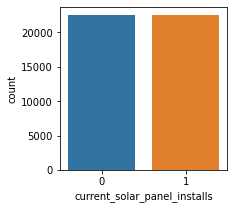

In [21]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
#the class with fewer values will be oversampled to reach the same number of values as the other class.
X_train, y_train = oversample.fit_resample(X_train, y_train)
plt.figure(figsize=(3,3))
sns.countplot(y_train)#The countplot shows the number of instances of each class in the oversampled y_train data.

In [22]:
print(('X_train shape =', X_train.shape), ('y_train shape =', y_train.shape), ('X_test shape =', X_test.shape), ('y_test shape =', y_test.shape))

('X_train shape =', (45190, 247)) ('y_train shape =', (45190,)) ('X_test shape =', (14471, 247)) ('y_test shape =', (14471,))


<font color=blue font face = "Verdana" size = "4">
<center><b>3. SUPERVISED LEARNING</b>

<font color=blue font face = "Verdana" size = "3">Supervised learning is a type of machine learning where the algorithm learns to predict an output variable based on a set of input variables, by training on a labeled dataset. In supervised learning, the dataset used for training the model has both input features and their corresponding output values. The goal is to use this labeled data to train the model to accurately predict the output value for new, unseen input data.

The goal here is to identify which models perform best with just the standard parameters\
to identify approximately 4 models that we will then use in a more in-depth analysis later\
where we work to optimize their hyperparameters to find the best model for our prediction.

We use performance metrics as model score, recall score, and precision score to evaluate the performance of a classification model.

* Model score:It is calculated as the number of true positives plus true negatives divided by the total number of samples.
* Recall score: It is calculated as the number of true positives divided by the sum of true positives and false negatives.
* Precision score: It is calculated as the number of true positives divided by the sum of true positives and false positives.

We will run the following Supervised Learning Models:
* Logistic Regression
* Linear Discrimant Analysis (LDA)
* K-Nearest Neighbor (KNN)
* Ridge Regressor
* Stochastic Gradient Descent
* Naive Bayes
* Decision Tree & Random Forest
* Support Vector Machine
* XGBoost

### 3.1 Running Logistic Regression for all solvers

Logistic Regression is a statistical learning algorithm used in binary classification tasks to predict the probability of an event occurring.\
The logistic regression models the relationship between the input variables and the binary output variable by estimating the probability of the event occurring using a logistic function.\
The logistic function is an S-shaped curve that transforms any input value to a range between 0 and 1, representing the probability of the positive class. Logistic regression models can be interpreted easily, and the parameters can be used to identify the most important features for the classification task.

The best parameters are: {'solver': 'liblinear'}

The Best Logistic Regression Accuracy on Training Data is:  73.46%
The Best Logistic Regression Accuracy on Test:  71.16%
The Best Logistic Regression Recall on Test:  68.89%
The Best Logistic Regression Precision on Test:  85.55%

Time taken to run cell in minutes:  0.87
{'Results': '1', 'Model': 'LogisticRegression', 'best_parms_solver': 'liblinear', 'test_accuracy': 0.71, 'time': 0.87}


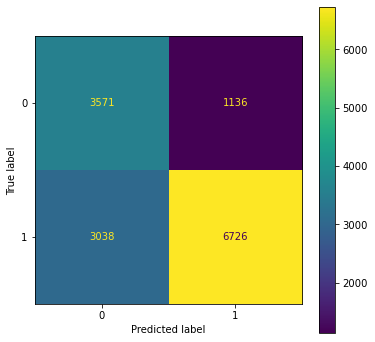

In [23]:
start_time = time.time()#time module to record the start time of the code execution.

#Grid search is a hyperparameter tuning technique used to determine the best combination of hyperparameters 
#for a machine learning model.
#The values of these hyperparameters can greatly impact the performance of a model.
#When GridSearchCV is fit to the data, it trains a separate model for each combination of hyperparameters 
#in the grid. It evaluates the performance of each model using cross-validation and selects the hyperparameters
#that result in the best performance. Once the best hyperparameters are identified, a new model is trained 
#using these hyperparameters, and this model can be used for making predictions on new data.


# Create the parameter grid dictionary with hyperparameters that will be searched over.
param_grid = {'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag'],} #hyperparameter
#Are different optimization algorithms or solvers that can be used to train a logistic regression model. 
#These solvers differ in terms of their computational efficiency, memory usage, and ability to handle 
#different types of datasets. 
#By specifying multiple solver algorithms and running a grid search, 
#we can identify the best solver algorithm that provides the best performance for the given dataset.

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Set up the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, n_jobs=-1)
#The GridSearchCV function is used to set up the grid search, with the specified param_grid,
#cross-validation (cv) strategy, and number of jobs (n_jobs) to run in parallel.

# The cross-validation is used for evaluating the performance of each hyperparameter combination. 
#In this case, it is set to 2, which means that the data will be split into two equal parts, 
#and the model will be trained and evaluated twice.

#n_jobs: This parameter controls the number of CPU cores to use for the computation. 
#Setting n_jobs to -1 will use all available CPU cores.

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)
#The fit method is used to run the grid search on the training data.

# Print the best hyperparameters found
print('The best parameters are:', grid_search.best_params_)
print('')
#contain the combination of hyperparameters that performed the best according to the grid search.

#Create a new logistic regression classifier object with the best hyperparameters found by the grid search 
#Then we fit the model on train & print the score on trianing data
model_lr = LogisticRegression(solver=grid_search.best_params_['solver'])
model_lr.fit(X_train, y_train)
print('The Best Logistic Regression Accuracy on Training Data is:  {:.2f}%'.format(model_lr.score(X_train, y_train)*100))

# predict on test
y_predict = model_lr.predict(X_test)
model_score_lr = model_lr.score(X_test, y_test)
print('The Best Logistic Regression Accuracy on Test:  {:.2f}%'.format((model_score_lr) * 100))
print('The Best Logistic Regression Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict)*100))
print('The Best Logistic Regression Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict)*100))

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min1 = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min1)

#plot a confusion matrix 
plt.rcParams['axes.grid'] = False
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#creates a dictionary that contains the results of the grid search and model evaluation
Results1 = {'Results':'1', 'Model':'LogisticRegression', 'best_parms_solver':grid_search.best_params_['solver'], 'test_accuracy':round(model_score_lr,2), 'time':min1}
print(color.BOLD + str(Results1) + color.END)

### **The Logistic Regression with the 'liblinear' solver produces the best accuracy results of 71.16%**

### 3.2 Running Linear Discriminant Analysis (LDA) for 'svd' solver then 'lsqr' solver and Quadratic Disc. Analysis

Linear Discriminant Analysis (LDA) Classifier is a statistical and machine learning algorithm used for classification tasks.\
It works by finding the linear combination of features that can best separate different classes of data.\
LDA assumes that the data follows a normal distribution and that the covariance matrix of the features is the same for all classes.

The LDA with svd solver Accuracy on Training data is:  73.80%
The LDA with svd Solver Accuracy on Test data is:  71.36%
The LDA with svd Solver Recall on Test:  69.05%
The LDA with svd Solver Precision on Test:  85.73%

Time taken to run cell in minutes:  0.1


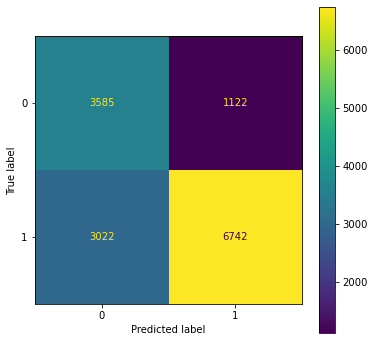

In [24]:
start_time = time.time() #time module to record the start time of the code execution.

#This code snippet shows how to fit an LDA model using the svd solver on training data, predict on test data, 
#and calculate model performance metrics such as accuracy, recall, and precision on both training and test data.

# Fit the model on train
model_ldas = LDA(solver='svd') #Create an LDA model with the svd solver.
model_ldas.fit(X_train, y_train) #Fit the LDA model on training data X_train and y_train.
model_score_ldas_r = model_ldas.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The LDA with svd solver Accuracy on Training data is:  {:.2f}%'.format((model_score_ldas_tr) * 100))

#predict on test
y_predict_ldas = model_ldas.predict(X_test) # Predict the target variable for test data using the fitted LDA model

#calculate the model score on test
model_score_ldas_te = model_ldas.score(X_test, y_test)
print('The LDA with svd Solver Accuracy on Test data is:  {:.2f}%'.format((model_score_ldas_te) * 100))
print('The LDA with svd Solver Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_ldas)*100))
print('The LDA with svd Solver Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_ldas)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_ldas)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min2a = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min2a)

The LDA with lsqr solver Accuracy on Training data is:  73.82%
The LDA with lsqr Solver Accuracy on Test data is:  71.38%
The LDA with lsqr Solver Recall on Test:  69.08%
The LDA with lsqr Solver Precision on Test:  85.73%

Time taken to run cell in minutes:  0.04


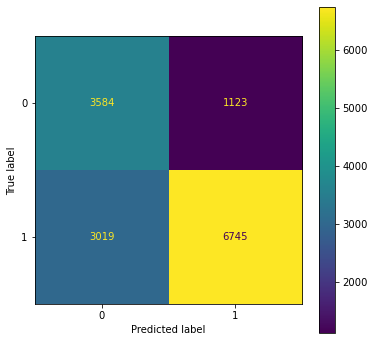

In [25]:
start_time = time.time()#time module to record the start time of the code execution.

#This code snippet shows how to fit a LDA model using the default solver on training data, predict on test data, 
#and calculate model performance metrics such as accuracy, recall, and precision on both training and test data.

# Fit the model on train
model_ldal = LDA(solver='lsqr') #Create an LDA model with the lsqr solver.
model_ldal.fit(X_train, y_train) #Fit the LDA model on training data X_train and y_train.
model_score_ldal_tr = model_ldal.score(X_train, y_train) #Calculate the model score (accuracy) on training data.
print('The LDA with lsqr solver Accuracy on Training data is:  {:.2f}%'.format((model_score_ldal_tr) * 100))

#predict on test
y_predict_ldal = model_ldal.predict(X_test) # Predict the target variable for test data using the fitted LDA model

#calculate the model score on test
model_score_ldal_te = model_ldal.score(X_test, y_test)
print('The LDA with lsqr Solver Accuracy on Test data is:  {:.2f}%'.format((model_score_ldal_te) * 100))
print('The LDA with lsqr Solver Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_ldal)*100))
print('The LDA with lsqr Solver Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_ldal)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_ldal)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min2b = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min2b)

The QDA with default solver Accuracy on Training data is:  61.65%
The QDA with default solver Accuracy on Test data is:  57.06%
The QDA with default solver Recall on Test:  50.76%
The QDA with default solver Precision on Test:  77.90%

Time taken to run cell in minutes:  0.11


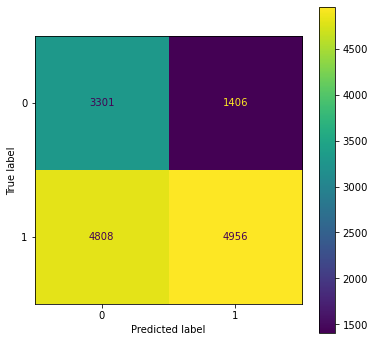

In [26]:
start_time = time.time() #time module to record the start time of the code execution.

#This code snippet shows how to fit a QDA model using the default solver on training data, predict on test data, 
#and calculate model performance metrics such as accuracy, recall, and precision on both training and test data.

# Fit the model on train
model_qda = QDA() #Create a QDA model with the default solver.
model_qda.fit(X_train, y_train) #Fit the QDA model on training data X_train and y_train.

#predict on test
y_predict_qda = model_qda.predict(X_test) #Predict the target variable for test data using the fitted QDA model.
model_score_qda_tr = model_qda.score(X_train, y_train) #Calculate the model score (accuracy) on training data.
print('The QDA with default solver Accuracy on Training data is:  {:.2f}%'.format((model_score_qda_tr) * 100))

#calculate the model score on test data 
model_score_qda = model_qda.score(X_test, y_test)
print('The QDA with default solver Accuracy on Test data is:  {:.2f}%'.format((model_score_qda) * 100))
print('The QDA with default solver Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_qda)*100))
print('The QDA with default solver Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_qda)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_qda)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min2c = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min2c)

In [27]:
#selects the best model and solver based on the highest accuracy score on the test data 
#among the three models: LDA with SVD solver, LDA with LSQR solver, and QDA with default solver.

#It also creates a dictionary Results2 that includes the results of the selected model and solver, 
#the accuracy on the test data, and the time taken to fit the model.

#Check if the accuracy of the LDA model with SVD solver is the highest among the three models.
if model_score_ldas_te > model_score_ldal_te and model_score_ldas_te > model_score_qda:
    Model = 'Linear Discrimant Analysis'
    BPS = 'SVD'
    min = min2a
    Accuracy = model_score_ldas_te
elif model_score_ldal_te > model_score_qda: #Check if the accuracy of the LDA model with LSQR solver is the highest among the remaining models.
    Model = 'Linear Discrimant Analysis'
    BPS = 'LSQR'
    min = min2b
    Accuracy = model_score_ldal_te
else: #If none of the above conditions is satisfied, it means that the QDA model has the highest accuracy.
    Model = 'Quadratic Discrimant Analysis'
    BPS = 'SVD'
    min = min2c
    Accuracy = model_score_qda


Results2 = {'Results':'2', 'Model':Model, 'best_parms_solver':BPS, 'test_accuracy':round(Accuracy,4), 'time':min}
print(color.BOLD + str(Results2) + color.END)

{'Results': '2', 'Model': 'Linear Discrimant Analysis', 'best_parms_solver': 'LSQR', 'test_accuracy': 0.7138, 'time': 0.04}


### **The LDA with the 'LSQR' solver produces the best accuracy results of 71.38%**

### 3.3 Running K-Nearest Neighbor Classifier

K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression tasks.\
It works by finding the K closest data points in the feature space to a new data point and predicting its label based on the labels of its nearest neighbors.\
The value of K is a hyperparameter that determines how many neighbors are considered.\
KNN is a non-parametric algorithm, meaning that it does not make any assumptions about the underlying distribution of the data.

The KNN Classifier Accuracy on Training data is:  76.19%
The KNN Classifier Accuracy on Test data is:  68.77%
The KNN Classifier Accuracy Recall on Test:  63.91%
The KNN Classifier Accuracy Precision on Test:  86.24%

Time taken to run cell in minutes:  2.49
{'Results': '3', 'Model': 'K-Nearest Neighbor', 'n_neighbors': '20', 'test_accuracy': 0.6877, 'time': 2.49}


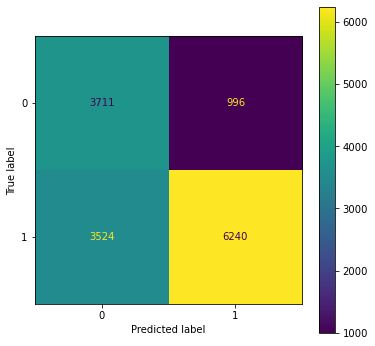

In [28]:
start_time = time.time() #time module to record the start time of the code execution.

model_knn = KNeighborsClassifier(n_neighbors=20) #Create an KNN model with number of neighbors equal to 20.

#Train the model using the training sets
model_knn.fit(X_train, y_train) #Fit the KNN model on training data X_train and y_train.
model_score_knn_tr = model_knn.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The KNN Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_knn_tr) * 100))

#Predict the response for test dataset
y_predict = model_knn.predict(X_test) #Predict the target variable for test data using the fitted KNN model
model_score_knn_te = model_knn.score(X_test, y_test)
print('The KNN Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_knn_te) * 100))
print('The KNN Classifier Accuracy Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict)*100))
print('The KNN Classifier Accuracy Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min3 = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min3)

Results3 = {'Results':'3', 'Model':'K-Nearest Neighbor', 'n_neighbors':'20', 'test_accuracy':round(model_score_knn_te,4), 'time':min3}
print(color.BOLD + str(Results3) + color.END)

### **The K-Nearest Neighbor with n-neighbors = 20 produces accuracy results of 68.77%**

### 3.4 Running Ridge Regressor Classifier

Ridge Regressor Classifier is a type of machine learning algorithm used for regression and classification tasks.\
It is a regularized version of linear regression that adds a penalty term to the cost function to prevent overfitting and reduces their variance.\
Ridge Regressor Classifier works by fitting a linear model to the training data and then predicting the class with the highest probability.

The Ridge Regressor Accuracy on Training data is:  73.49%
The Ridge Regressor Classifier Accuracy on Test data is:  71.14%
The Ridge Regressor Classifier  Recall on Test:  68.56%
The Ridge Regressor Classifier  Precision on Test:  85.81%

Time taken to run cell in minutes:  0.02
{'Results': '4', 'Model': 'Ridge Regressor', 'solver': 'default', 'test_accuracy': 0.7114, 'time': 0.02}


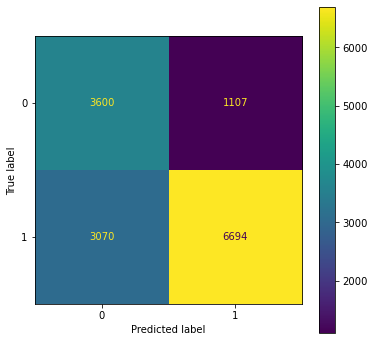

In [29]:
start_time = time.time() #time module to record the start time of the code execution.

# Fit the model on train
model_rc = RidgeClassifier() #Create an RC model with a defaul solver
model_rc.fit(X_train, y_train) #Fit the RC model on training data X_train and y_train.
model_score_rc_tr = model_rc.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The Ridge Regressor Accuracy on Training data is:  {:.2f}%'.format((model_score_rc_tr) * 100))

#predict on test
y_predict = model_rc.predict(X_test) #Predict the target variable for test data using the fitted RC model

model_score_rc_te = model_rc.score(X_test, y_test)
print('The Ridge Regressor Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_rc_te) * 100))
print('The Ridge Regressor Classifier  Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict)*100))
print('The Ridge Regressor Classifier  Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min4 = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min4)

Results4 = {'Results':'4', 'Model':'Ridge Regressor', 'solver':'default', 'test_accuracy':round(model_score_rc_te,4), 'time':min4}
print(color.BOLD + str(Results4) + color.END)

### **The Ridge Regressor Classifier produces accuracy results of 71.14%**

### 3.5 Running the Stochastic Gradient Descent (SGD) Classifier

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm used for minimizing the cost function of a machine learning model.\
It is a variant of Gradient Descent.\
SGD differs from Gradient Descent in that it uses a small subset of the training data (called a batch), to compute the gradient at each iteration.\
This makes it much faster than Gradient Descent, especially for large datasets.

The Stochastic Gradient Descent Classifier Accuracy on Training data is:  72.80%
The Stochastic Gradient Descent Classifier Accuracy on Test data is:  68.88%
The Stochastic Gradient Descent  Recall on Test:  63.66%
The Stochastic Gradient Descent Precision on Test:  86.67%

Time taken to run cell in minutes:  0.02
{'Results': '5', 'Model': 'Stochastic Gradient Descent', 'parameters': 'default', 'test_accuracy': 0.6888, 'time': 0.02}


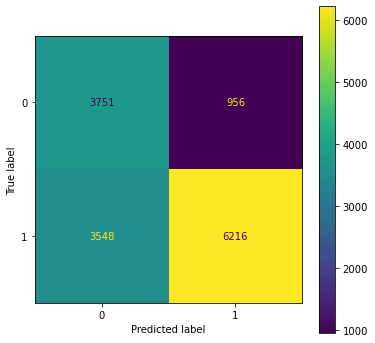

In [30]:
start_time = time.time() #time module to record the start time of the code execution.

# Fit the model on train
model_sgd = SGDc() #Create an SGDc model.
model_sgd.fit(X_train, y_train) #Fit the SGDc model on training data X_train and y_train.
model_score_sgd_tr = model_sgd.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The Stochastic Gradient Descent Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_sgd_tr) * 100))

#predict on test
y_predict_sgd = model_sgd.predict(X_test) #Predict the target variable for test data using the fitted SGDc model

#calculate the model score on test
model_score_sgd_te = model_sgd.score(X_test, y_test)
print('The Stochastic Gradient Descent Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_sgd_te) * 100))
print('The Stochastic Gradient Descent  Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_sgd)*100))
print('The Stochastic Gradient Descent Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_sgd)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_sgd)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min5 = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min5)

Results5 = {'Results':'5', 'Model':'Stochastic Gradient Descent', 'parameters':'default', 'test_accuracy':round(model_score_sgd_te,4), 'time':min5}
print(color.BOLD + str(Results5) + color.END)

### **The Stochastic Gradient Descent Classifier produces accuracy results of 68.88%**

### 3.6 Running various Naive Bayes Models

Naive Bayes models are a family of probabilistic machine learning algorithms used for classification and regression tasks.\
They are based on Bayes' theorem, which states that the probability of a hypothesis (in this case, the label or value of the target variable) given the evidence (in this case, the values of the features) is proportional to the likelihood of the evidence given the hypothesis multiplied by the prior probability of the hypothesis.\
Naive Bayes models make assumption that the features are independent given the label, which means that the presence or absence of one feature does not affect the probability of another feature.\
There are several variations of the Naive Bayes algorithm, including:

* Complement Naive Bayes (CNB) It is a probabilistic algorithm that is designed to handle imbalanced datasets.
* Gaussian Naive Bayes: used for continuous data, where the features are assumed to be normally distributed.
* Multinomial Naive Bayes: used for discrete data, such as text classification where the features are counts of the occurrences of certain words.
* Bernoulli Naive Bayes: a variation of Multinomial Naive Bayes used when the features are binary, indicating the presence or absence of a certain feature.

The ComplementNB Classifier Accuracy on Training data is:  63.95%
The ComplementNB Classifier Accuracy on Test data is:  63.07%
The ComplementNB Classifier Recall on Test:  61.73%
The ComplementNB Classifier Precision on Test:  78.95%

Time taken to run cell in minutes:  0.01


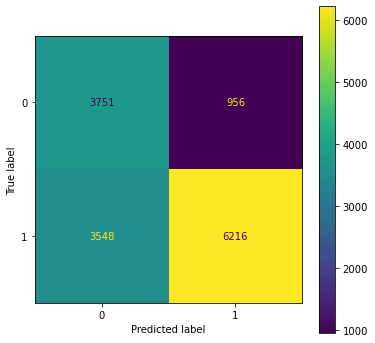

In [31]:
start_time = time.time() #time module to record the start time of the code execution.

model_cnb = ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False) #Create an CNB model.

#Alpha: is a smoothing parameter that prevents zero probabilities when computing likelihoods. 
#An alpha of 1.0 indicates that Laplace smoothing is being used.

#Fit_prior: is a Boolean parameter that indicates whether or not to learn class prior probabilities from
#the training data. If set to True, the algorithm will estimate the prior probabilities of each class from
#the relative frequencies of each class in the training data. 
#If set to False, the algorithm will assume equal prior probabilities for all classes.

#Class_prior: This parameter allows you to specify prior probabilities for each class. 
#If it is set to None, the algorithm will use the values determined by the fit_prior parameter. 
#Otherwise, you can pass an array-like object of shape (n_classes,) containing the prior probabilities 
#for each class.

#norm: This parameter indicates whether or not to normalize the input data before training.
#If set to True, the algorithm will apply L2 normalization to each input vector. 
#If set to False, the algorithm will assume that the input data is already normalized.

# Fit the model on train
model_cnb.fit(X_train, y_train) #Fit the CNB model on training data X_train and y_train.
model_score_cnb_tr = model_cnb.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The ComplementNB Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_cnb_tr) * 100))

#predict on test
y_predict_cnb = model_cnb.predict(X_test) #Predict the target variable for test data using the fitted CNB model

#calculate the model score on test
model_score_cnb_te = model_cnb.score(X_test, y_test)
print('The ComplementNB Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_cnb_te) * 100))
print('The ComplementNB Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_cnb)*100))
print('The ComplementNB Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_cnb)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_sgd)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min6a = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min6a)

The GaussianNB Classifier Accuracy on Training data is:  63.95%
The GaussianNB Classifier Accuracy on Test data is:  56.61%
The GaussianNB Classifier Recall on Test:  48.44%
The GaussianNB Classifier Precision on Test:  79.16%

Time taken to run cell in minutes:  0.02


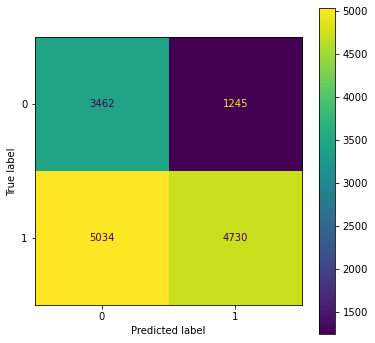

In [32]:
start_time = time.time() #time module to record the start time of the code execution.

# Fit the model on train
model_gnb = GaussianNB() #Create an GNB model.
model_gnb.fit(X_train, y_train) #Fit the GNB model on training data X_train and y_train.
model_score_gnb_tr = model_cnb.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The GaussianNB Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_gnb_tr) * 100))

#predict on test
y_predict_gnb = model_gnb.predict(X_test) #Predict the target variable for test data using the fitted GNB model

#calculate the model score on test
model_score_gnb_te = model_gnb.score(X_test, y_test)
print('The GaussianNB Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_gnb_te) * 100))
print('The GaussianNB Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_gnb)*100))
print('The GaussianNB Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_gnb)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_gnb)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min6b = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min6b)

The MultinomialNB Classifier Accuracy on Training data is:  63.95%
The MultinomialNB Classifier Accuracy on Test data is:  63.07%
The MultinomialNB Classifier Recall on Test:  61.73%
The MultinomialNB Classifier Precision on Test:  78.95%

Time taken to run cell in minutes:  0.01


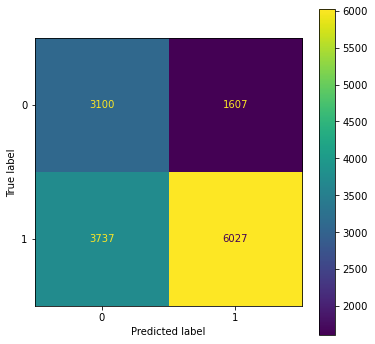

In [33]:
start_time = time.time() #time module to record the start time of the code execution.

# Fit the model on train
model_mnb = MultinomialNB() #Create an MNB model.
model_mnb.fit(X_train, y_train) #Fit the MNB model on training data X_train and y_train.
model_score_mnb_tr = model_mnb.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The MultinomialNB Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_mnb_tr) * 100))

#predict on test
y_predict_mnb = model_mnb.predict(X_test) #Predict the target variable for test data using the fitted MNB model

#calculate the model score on test
model_score_mnb_te = model_mnb.score(X_test, y_test)
print('The MultinomialNB Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_mnb_te) * 100))
print('The MultinomialNB Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_mnb)*100))
print('The MultinomialNB Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_mnb)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_mnb)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min6c = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min6c)

The BernoulliNB Classifier Accuracy on Training data is:  63.89%
The BernoulliNB Classifier Accuracy on Test data is:  67.84%
The BernoulliNB Classifier Recall on Test:  75.36%
The BernoulliNB Classifier Precision on Test:  76.60%

Time taken to run cell in minutes:  0.02


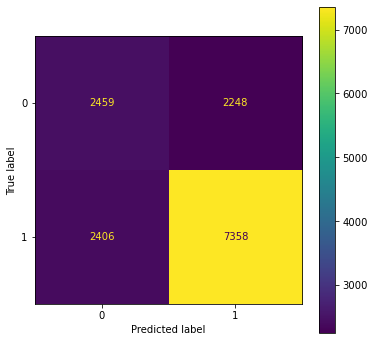

In [34]:
start_time = time.time() #time module to record the start time of the code execution.

# Fit the model on train
model_bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None) #Create an BNB model.

#binarize: This is a threshold value used to binarize (i.e., convert to binary) the input data.
#Any feature value below this threshold is set to 0, while any value equal to or above the threshold is set to 1. 
#If binarize is set to None, the input data is assumed to already be binary.

model_bnb.fit(X_train, y_train) #Fit the BNB model on training data X_train and y_train.
model_score_bnb_tr = model_bnb.score(X_train, y_train) #Calculate the model score (accuracy) on training data
print('The BernoulliNB Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_bnb_tr) * 100))

#predict on test
y_predict_bnb = model_bnb.predict(X_test) #Predict the target variable for test data using the fitted BNB model

model_score_bnb_te = model_bnb.score(X_test, y_test)
print('The BernoulliNB Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_bnb_te) * 100))
print('The BernoulliNB Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_bnb)*100))
print('The BernoulliNB Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_bnb)*100))

#plot a confusion matrix
cm = confusion_matrix(y_test, y_predict_bnb)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

#the time module to record the end time of the code execution
print('')
end_time = time.time()
min6d = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min6d)

In [35]:
#Check if the accuracy of ComplementNB, GaussianNB, MultinomialNB, and BernoulliNB
#based on their accuracy scores on the test data.
if model_score_cnb_te > model_score_gnb_te and model_score_cnb_te > model_score_mnb_te and model_score_cnb_te > model_score_bnb_te :
    Model = 'ComplementNB'
    Perameters = 'default'
    min6 = min6a
    Accuracy = model_score_cnb_te
elif model_score_gnb_te > model_score_mnb_te and model_score_gnb_te > model_score_bnb_te: 
    Model = 'GaussianNB'
    Perameters = 'default'
    min6 = min6b
    Accuracy = model_score_gnb_te
elif model_score_mnb_te > model_score_bnb_te:
    Model = 'MultinomialNB'
    Perameters = 'default'
    min6 = min6c
    Accuracy = model_score_mnb_te
else:
    Model = 'BernoulliNB'
    Perameters = 'default'
    min6 = min6d
    Accuracy = model_score_bnb_te



Results6 = {'Results':'6', 'Model':Model, 'Parameters':Perameters, 'test_accuracy':round(Accuracy,4), 'time':min6}
print(color.BOLD + str(Results6) + color.END)

{'Results': '6', 'Model': 'BernoulliNB', 'Parameters': 'default', 'test_accuracy': 0.6784, 'time': 0.02}


### **The BernoulliNB Model produces the best accuracy results for the Niave Bayes Models at 67.84%**

### 3.7 Now we will run the Decision Tree and Random Forrest models

Decision Tree and Random Forest Models are machine learning algorithms used for classification and regression tasks. A decision tree is a tree-like structure that partitions the feature space into rectangular regions, where each node corresponds to a test on a single feature, and each edge corresponds to a possible outcome of the test. The leaves of the tree correspond to the predicted value or class of the target variable. Decision trees are simple and easy to interpret, but they can be prone to overfitting and high variance.

Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the predictions. It works by building a set of decision trees on random subsets of the training data and random subsets of the features, and then aggregating their predictions by majority voting (for classification) or averaging (for regression). Random Forest can reduce the variance and overfitting of decision trees and can handle complex feature interactions and nonlinear relationships. It is a popular and effective algorithm for a wide range of applications, such as image and speech recognition, bioinformatics, and finance.

The Decision Tree Classifier Accuracy on Training data is:  100.00%
The Decision Tree Classifier Accuracy on Test data is:  70.17%
The Decision Tree Classifier Recall on Test:  77.66%
The Decision Tree Classifier Precision on Test:  78.03%

Time taken to run cell in minutes:  0.41


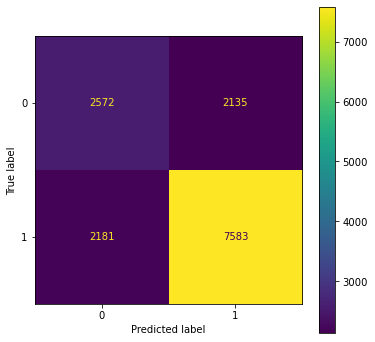

In [36]:
start_time = time.time()

#Build the decision Tree
model_dTree1 = DecisionTreeClassifier()
model_dTree1.fit(X_train, y_train)
model_score_dTree1_tr = model_dTree1.score(X_train, y_train)
print('The Decision Tree Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_dTree1_tr) * 100))

#predict on test
y_predict_dTree1 = model_dTree1.predict(X_test)
model_score_dTree1_te = model_dTree1.score(X_test, y_test)
print('The Decision Tree Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_dTree1_te) * 100))
print('The Decision Tree Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_dTree1)*100))
print('The Decision Tree Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_dTree1)*100))

cm = confusion_matrix(y_test, y_predict_dTree1)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min7a = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min7a)

The Random Forest Classifier Accuracy on Training data is:  100.00%
The Random Forest Classifier Accuracy on Test data is:  76.88%
The Random Forest Classifier Recall on Test:  87.25%
The Random Forest Classifier Precision on Test:  80.22%

Time taken to run cell in minutes:  1.64


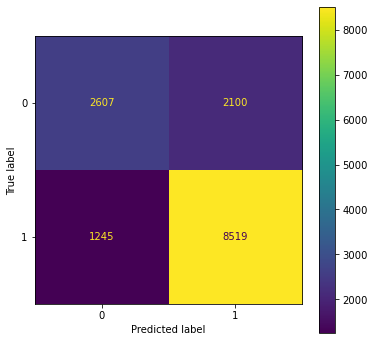

In [37]:
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier

#Build the random forest decision Tree
model_dTreerf = RandomForestClassifier()
model_dTreerf.fit(X_train, y_train)
model_score_dTreerf_tr = model_dTreerf.score(X_train, y_train)
print('The Random Forest Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_dTreerf_tr) * 100))

#predict on test
y_predict_dTreerf = model_dTreerf.predict(X_test)
model_score_dTreerf_te = model_dTreerf.score(X_test, y_test)
print('The Random Forest Classifier Accuracy on Test data is:  {:.2f}%'.format((model_score_dTreerf_te) * 100))
print('The Random Forest Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_dTreerf)*100))
print('The Random Forest Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_dTreerf)*100))

cm = confusion_matrix(y_test, y_predict_dTreerf)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min7b = round(((end_time - start_time)/60),2)
print(color.CYAN + "Time taken to run cell in minutes: " + color.END, min7b)

In [38]:
if model_dTree1.score(X_test, y_test) > model_dTreerf.score(X_test, y_test):
    Model = 'Decision Tree'
    Perameters = 'default'
    min7 = min7a
    Accuracy = model_dTree1.score(X_test, y_test)
else:
    Model = 'Random Forrest'
    Perameters = 'default'
    min7 = min7b
    Accuracy = model_dTreerf.score(X_test, y_test)

Results7 = {'Results':'7', 'Model':Model, 'Parameters':Perameters, 'test_accuracy':round(Accuracy,4), 'time':min7}
print(color.BOLD + str(Results7) + color.END)

{'Results': '7', 'Model': 'Random Forrest', 'Parameters': 'default', 'test_accuracy': 0.7688, 'time': 1.64}


**The RandomForest Classifier produces the best accuracy results for the Decision Tree Models at 76.8%.**  
**However using the default perameters you have clear overfitting since the training set accuracy is much higher**

### 3.8 Now we will try some Support Vector Machine Classifiers

Support Vector Machine (SVM) models are a class of supervised machine learning algorithms used for classification and regression tasks. They work by finding the hyperplane in the feature space that maximally separates the data points of different classes. The hyperplane is defined as the set of points where the inner product of the feature vector and a weight vector plus a bias term is zero. SVM seeks to minimize the classification error while maximizing the margin, which is the distance between the hyperplane and the closest data points of each class. In cases where the data are not linearly separable, SVM uses a kernel function to transform the feature space into a higher-dimensional space, where the data can be separated by a hyperplane. SVM has several advantages, including the ability to handle high-dimensional data, to find a global solution, and to control the complexity of the model through the choice of the kernel and the regularization parameter.\
We will analyse three different models: SVC, LinearSVC, and NuSVC are all algorithms for classification tasks, with SVC and LinearSVC differing in the type of decision boundary they learn and NuSVC providing more control over the number of support vectors used. The choice between these algorithms depends on the complexity of the problem and the size of the dataset.

The SVC Classifier Accuracy on Training data is:  76.15%
The SVC Classifier Accuracy on Test data is:  72.69%
The SVC Classifier Recall on Test:  70.78%
The SVC Classifier Precision on Test:  86.28%

Time taken to run cell in minutes:  34.04


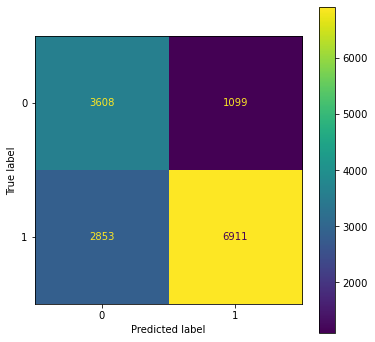

In [39]:
start_time = time.time()

from sklearn.svm import SVC

#Build and Fit the SVC Model to training data
model_svc = SVC()
model_svc.fit(X_train, y_train)
model_score_svc_tr = model_svc.score(X_train, y_train)
print('The SVC Classifier Accuracy on Training data is:  {:.2f}%'.format(model_score_svc_tr * 100))


# Predict labels for new data
y_predict_svc = model_svc.predict(X_test)
model_score_svc_te = model_svc.score(X_test, y_test)
print('The SVC Classifier Accuracy on Test data is:  {:.2f}%'.format(model_score_svc_te * 100))
print('The SVC Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_svc)*100))
print('The SVC Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_svc)*100))

cm = confusion_matrix(y_test, y_predict_svc)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min8a = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min8a)

The SVC Classifier Accuracy on Training data is:  84.11%
The SVC Classifier Accuracy on Test data is:  74.31%
The SVC Classifier Recall on Test:  74.29%
The SVC Classifier Precision on Test:  85.73%

Time taken to run cell in minutes:  54.52


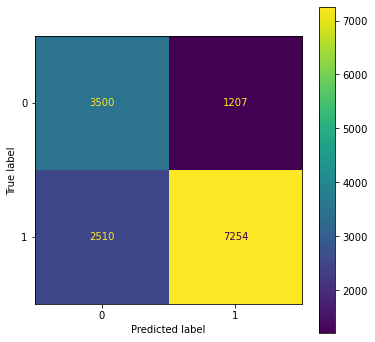

In [40]:
start_time = time.time()

from sklearn.svm import NuSVC

#Build and Fit the SVC Model to training data
model_nusvc = NuSVC()
model_nusvc.fit(X_train, y_train)
model_score_nusvc_tr = model_nusvc.score(X_train, y_train)
print('The SVC Classifier Accuracy on Training data is:  {:.2f}%'.format(model_score_nusvc_tr * 100))


# Predict labels for new data
y_predict_nusvc = model_nusvc.predict(X_test)
model_score_nusvc_te = model_nusvc.score(X_test, y_test)
print('The SVC Classifier Accuracy on Test data is:  {:.2f}%'.format(model_score_nusvc_te * 100))
print('The SVC Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_nusvc)*100))
print('The SVC Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_nusvc)*100))

cm = confusion_matrix(y_test, y_predict_nusvc)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min8b = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min8b)

The SVC Classifier Accuracy on Training data is:  76.15%
The SVC Classifier Accuracy on Test data is:  72.69%
The SVC Classifier Recall on Test:  70.78%
The SVC Classifier Precision on Test:  86.28%

Time taken to run cell in minutes:  33.66


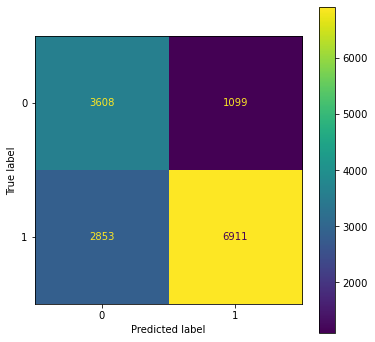

In [41]:
start_time = time.time()

from sklearn.svm import LinearSVC

#Build and Fit the SVC Model to training data
model_lsvc = SVC()
model_lsvc.fit(X_train, y_train)
model_score_lsvc_tr = model_lsvc.score(X_train, y_train)
print('The SVC Classifier Accuracy on Training data is:  {:.2f}%'.format(model_score_lsvc_tr * 100))


# Predict labels for new data
y_predict_lsvc = model_lsvc.predict(X_test)
model_score_lsvc_te = model_lsvc.score(X_test, y_test)
print('The SVC Classifier Accuracy on Test data is:  {:.2f}%'.format(model_score_lsvc_te * 100))
print('The SVC Classifier Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_lsvc)*100))
print('The SVC Classifier Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_lsvc)*100))

cm = confusion_matrix(y_test, y_predict_lsvc)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min8c = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min8c)

In [42]:
if model_score_svc_te > model_score_nusvc_te and model_score_svc_te > model_score_lsvc_te:
    Model = 'SVC'
    Perameters = 'default'
    min8 = min8a
    Accuracy = model_score_svc_te
elif model_score_nusvc_te > model_score_lsvc_te:
    Model = 'NuSVC'
    Perameters = 'default'
    min8 = min8b
    Accuracy = model_score_nusvc_te
else:
    Model = 'LinearSVC'
    Perameters = 'default'
    min8 = min8c
    Accuracy = mmodel_score_lsvc_te
    
Results8 = {'Results':'8', 'Model':Model, 'Parameters':Perameters, 'test_accuracy':round(Accuracy,4), 'time':min8}
print(color.BOLD + str(Results8) + color.END)

{'Results': '8', 'Model': 'NuSVC', 'Parameters': 'default', 'test_accuracy': 0.7431, 'time': 54.52}


**The Nu-SVC Classifier produces the best accuracy results for the SVC Models at 76.8%.**

### 3.9 Now we will run an XGBoost Model

XGBoost (eXtreme Gradient Boosting) is a popular machine learning algorithm used for regression, classification, and ranking tasks. It is an optimized implementation of the Gradient Boosting algorithm that combines multiple weak learners (decision trees) to form a powerful ensemble model. XGBoost uses a regularized objective function that balances the error and the complexity of the model, which helps to prevent overfitting and improve generalization. It also employs a technique called gradient boosting that trains the model in a stage-wise manner, where each new tree is trained on the residual errors of the previous tree. This allows XGBoost to capture complex feature interactions and non-linear relationships, handle missing values, and provide feature importance measures. XGBoost is highly customizable and supports various types of data, including numerical, categorical, and text data.

The XGBoost Accuracy on Training data is:  95.03%
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      4707
           1       0.85      0.81      0.83      9764

    accuracy                           0.77     14471
   macro avg       0.75      0.76      0.75     14471
weighted avg       0.78      0.77      0.78     14471

[[3314 1393]
 [1864 7900]]

The XGBoost Accuracy on Test data is:  77.49%
The XGBoost Recall on Test:  80.91%
The XGBoost Precision on Test:  85.01%

Time taken to run cell in minutes:  0.04
{'Results': '9', 'Model': 'XGBoost', 'Parameters': 'default', 'test_accuracy': 0.7749, 'time': 1.24}


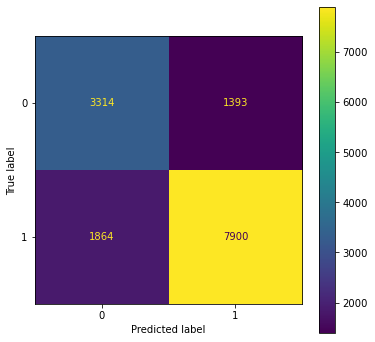

In [43]:
start_time = time.time()

import sklearn.metrics as metrics

model_xgb = xgb.XGBClassifier(eval_metric = 'error') # paramiter to minimize the classification error rate during training. 
model_xgb.fit(X_train, y_train)
model_score_xgb_tr = model_xgb.score(X_train, y_train)
print('The XGBoost Accuracy on Training data is:  {:.2f}%'.format(model_score_xgb_tr * 100))

expected_y  = y_test
predicted_y = model_xgb.predict(X_test)

#compute various classification metrics and visualize the confusion matrix.
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

print('')
model_xgb_score_te = model_xgb.score(X_test, y_test)
print('The XGBoost Accuracy on Test data is:  {:.2f}%'.format(model_xgb_score_te * 100))
print('The XGBoost Recall on Test:  {:.2f}%'.format(recall_score(y_test, predicted_y)*100))
print('The XGBoost Precision on Test:  {:.2f}%'.format(precision_score(y_test, predicted_y)*100))

sns.reset_orig()
cm = confusion_matrix(y_test, predicted_y)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min9 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min)

Results9 = {'Results':'9', 'Model':'XGBoost', 'Parameters':'default', 'test_accuracy':round(model_xgb_score_te,4), 'time':min9}
print(color.BOLD + str(Results9) + color.END)

#The model may be overfitting to the training data and not generalizing well to new data.

The classification_report() shows precision, recall, and F1-score metrics for each class (0 and 1) as well as overall metrics.\
The precision score represents the proportion of positive predictions that are actually true positives, while recall represents the proportion of true positives that were correctly identified.\
The F1-score is the harmonic mean of precision and recall, and is a combined measure of precision and recall.

The confusion_matrix() shows the number of true positives, true negatives, false positives, and false negatives for each class, allowing for a more detailed analysis of the model's performance.

In [44]:
print(Results1)
print(Results2)
print(Results3)
print(Results4)
print(Results5)
print(Results6)
print(Results7)
print(Results8)
print(Results9)

{'Results': '1', 'Model': 'LogisticRegression', 'best_parms_solver': 'liblinear', 'test_accuracy': 0.71, 'time': 0.87}
{'Results': '2', 'Model': 'Linear Discrimant Analysis', 'best_parms_solver': 'LSQR', 'test_accuracy': 0.7138, 'time': 0.04}
{'Results': '3', 'Model': 'K-Nearest Neighbor', 'n_neighbors': '20', 'test_accuracy': 0.6877, 'time': 2.49}
{'Results': '4', 'Model': 'Ridge Regressor', 'solver': 'default', 'test_accuracy': 0.7114, 'time': 0.02}
{'Results': '5', 'Model': 'Stochastic Gradient Descent', 'parameters': 'default', 'test_accuracy': 0.6888, 'time': 0.02}
{'Results': '6', 'Model': 'BernoulliNB', 'Parameters': 'default', 'test_accuracy': 0.6784, 'time': 0.02}
{'Results': '7', 'Model': 'Random Forrest', 'Parameters': 'default', 'test_accuracy': 0.7688, 'time': 1.64}
{'Results': '8', 'Model': 'NuSVC', 'Parameters': 'default', 'test_accuracy': 0.7431, 'time': 54.52}
{'Results': '9', 'Model': 'XGBoost', 'Parameters': 'default', 'test_accuracy': 0.7749, 'time': 1.24}


***
<font color=blue font face = "WIldWest" size = "5">Summary of initial model results based on default perameters:<font>
***

1. Logistic Regression w/'liblinear' solver produced accuracy results of **71.0%**
2. The LDA with the 'svd' solver produced accuracy results of **71.4%**
3. K-Nearest Neighbor Classifier produced accuracy results of **68.7%**
4. Ridge Regressor Classifier produced accuracy results of **71.2%**
5. Stochastic Gradient Descent Classifier produced accuracy results of **68.8%**
6. Naive Bayes BernoulliNB produced accuracy results of **67.9%**
7. Random Forrest Classifier produced accuracy results of **76.8%**
8. Support Vector Machine NuSVC produced accuracy results of **74.3%**
9. XGBoost Model Classifier produced results of **77.5%**

### Results Conclusions for models ran using the default perameters
1. From an Accuracy perspective, the Naive Baines models performed the worst which was not suprising since they assume independence among feature variables which is not the case with our data.
2. The more sofisticated models such as SVC, Random Forest and XGBoost performed best overall and performed about 8-10% better than the more classical models in regards to Accuracy.
3. Every single model had a higher Recall Score than Accuracy and in some cases the recall score was much higher (>20%)
4. The time to run the SVC Models was significantly more than all the other models.  They could take over 1 hour to run while most other models took only a few minutes or in some cases seconds.

### We will now take the top 4 models and use cross validation and grid search to try to optimize thier results to produce the best performant model.  The 4 models we will hypertune are:
1. Linear Discriminant Analysis (LDA)
2. Nu-Support Vector Classification (NuSVC) 
3. Random Forrest
4. XGBoost

### 3.10 Now we will us GridSearch CV on our best LDA Model

"Hyper Tuned LDA" likely refers to a Linear Discriminant Analysis (LDA) model that has been optimized using a hyperparameter tuning process. The hyperparameter tuning process is a way of finding the best combination of hyperparameters for a given model, which can help improve its performance on a given task. In this case, the LDA model was tuned using the GridSearchCV function, which exhaustively searches over a grid of hyperparameters to find the combination that performs the best on a validation set. The resulting "Hyper Tuned LDA" model likely has improved performance compared to an untuned LDA model, and its hyperparameters are likely optimized for the specific dataset and task at hand.

This code defines a parameter grid for the Linear Discriminant Analysis (LDA) classifier, creates an LDA classifier object, sets up a grid search using cross-validation to find the best hyperparameters for the LDA classifier, fits the grid search to the training data, and evaluates the performance of the best LDA classifier found on the test data.

The LDA with svd solver Accuracy on Training data is:  73.82%
{'n_components': None, 'shrinkage': None, 'solver': 'lsqr', 'store_covariance': True}
The LDA Model with the best perameters accuracy = 71.38%
The LDA with svd Solver Recall on Test:  69.08%
The LDA with svd Solver Precision on Test:  85.73%

Time taken to run cell in minutes:  5.14
{'Results': 'HT1', 'Model': 'Hyper Tuned LDA', 'Parameters': {'n_components': None, 'shrinkage': None, 'solver': 'lsqr', 'store_covariance': True}, 'test_accuracy': 0.7138, 'time': 5.14}


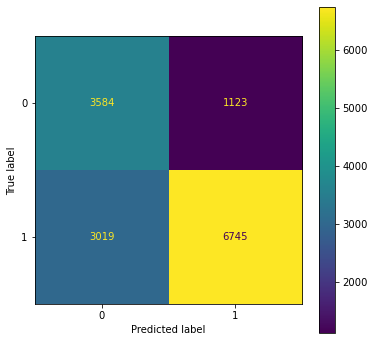

In [45]:
start_time = time.time()

# Create the parameter grid
param_grid_LDA = {'solver': ['svd', 'lsqr'],
              'shrinkage': [None,0.2, 0.4, 0.6, 0.8, 1.0],
              'n_components': [None, 1, 2, 3, 4, 5],
              'store_covariance': [True, False]
             }

# solver: This parameter determines the algorithm used to compute the linear discriminants. 
#It can take two values, 'svd' and 'lsqr', The default solver is 'svd.

# shrinkage: This parameter only applies when solver='lsqr' it is the amount of regularization applied to 
#the covariance matrix when computing the LDA components. 
#It can be None or a float between 0 and 1. When shrinkage is None, the covariance matrix is estimated from 
#the data by computing the sample covariance, otherwise the regularized covariance is computed instead.
#Possible values are None, 0.2, 0.4, 0.6, 0.8, and 1.0.

## n_components: This parameter determines the number of linear discriminants (i.e., the dimensionality of 
#the transformed space). You can set this parameter to a value less than the number of features to reduce 
#the dimensionality of the data. By default, it is set to None and all the linear discriminants are kept.
#Possible values are None, 1, 2, 3, 4, and 5.

# store_covariance : This parameter determines whether the estimated covariance matrix of the transformed data 
#should be stored. When set to True, it allows you to use the covariance_ attribute to obtain the estimated 
#covariance matrix of the transformed data.
#Possible values are True and False.

# priors : This parameter is the class prior probabilities. The prior probabilities are used when computing 
#the decision function. By default, they are the class frequencies.

# Create a LDA classifier
clf_LDA_HT = LDA()

# Set up the grid search
LDA_HT = GridSearchCV(estimator=clf_LDA_HT, param_grid=param_grid_LDA, cv=5, n_jobs=-1)

# Fit the grid search to the data
LDA_HT.fit(X_train, y_train)
model_score_LDA_HT_tr = LDA_HT.score(X_train, y_train)
print('The LDA with svd solver Accuracy on Training data is:  {:.2f}%'.format((model_score_LDA_HT_tr) * 100))

# predict on test set using the best parameters
LDA_HT_y_pred = LDA_HT.predict(X_test)

# Print the best hyperparameters found
print(LDA_HT.best_params_)

#calculate the model score on test
model_score_LDA_HT_te = LDA_HT.score(X_test, y_test)
print('The LDA Model with the best perameters accuracy = {:.2f}%'.format(model_score_LDA_HT_te * 100))
print('The LDA with svd Solver Recall on Test:  {:.2f}%'.format(recall_score(y_test, LDA_HT_y_pred)*100))
print('The LDA with svd Solver Precision on Test:  {:.2f}%'.format(precision_score(y_test, LDA_HT_y_pred)*100))

cm = confusion_matrix(y_test, LDA_HT_y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min_ht1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht1)

HTResults1 = {'Results':'HT1', 'Model':'Hyper Tuned LDA', 'Parameters':LDA_HT.best_params_, 'test_accuracy':round(model_score_LDA_HT_te,4), 'time':min_ht1}
print(color.BOLD + str(HTResults1) + color.END)

#the results of hyperparameter tuning for an LDA classifier:

### 3.11 Now we will use GridsearchCV on our best SVC Model which was the NuSVC

This code performs hyperparameter tuning for a Support Vector Machine (SVM) classifier using the NuSVC algorithm. The NuSVC algorithm is a variant of the SVM algorithm that uses a parameter "nu" instead of the regular "C" parameter to control the trade-off between margin errors and training errors.

Fitting 2 folds for each of 1 candidates, totalling 2 fits
The LDA with svd solver Accuracy on Training data is:  84.10%
{'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5, 'shrinking': False, 'tol': 0.001}

The NuSVC Model with the best perameters accuracy on Test = 74.29%
The NuSVC Model with the best perameters Recall on Test = 74.27%
The NuSVC Model with the best perameters Precision on Test = 85.72%

Time taken to run cell in minutes:  97.42
{'Results': 'HT2', 'Model': 'Nu-SVC', 'Parameters': {'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5, 'shrinking': False, 'tol': 0.001}, 'test_accuracy': 0.7429, 'time': 97.42}


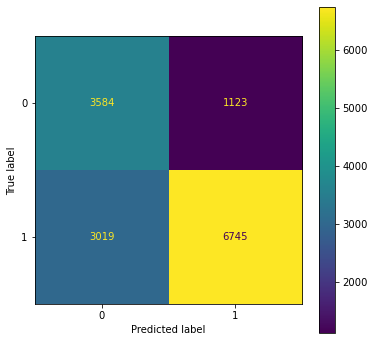

In [46]:
start_time = time.time()

# FIRST TIME RAN WITH BELOW GRID SEARCH PERAMETERS WHICH PRODUCED THE FOLLOWING RESULTS:
# Fitting 2 folds for each of 36 candidates, totalling 72 fits
# {'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5, 'shrinking': False, 'tol': 0.1}
# **The NuSVC Model with the best perameters accuracy = 77.20%**
# Time taken to run cell in minutes:  177.12

# param_grid_NuSVC = {'nu': [0.1, 0.3, 0.5],
#                    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                    'degree': [1, 3, 5],
#                    'gamma': ['scale'], # setting to scaled not 'auto' since our data is already scaled
#                    'shrinking' : [False],  # setting to false as I will set a large stopping tolerance to speed up model
#                    'class_weight' : ['balanced'], # setting to balanced instead of "None" since y is unbalanced approx 33%/66%
#                    'tol' : [0.1] # setting high stopping tolerance to speed up model
#                   }

# SECOND TIME WE WILL RUN IT WITH THE BEST PERAMETERS FROM THE FIRST GRID SEARCH & 'tol' (Tolarance) = 0.001 which is the default

param_grid_NuSVC = {'nu': [0.5],
                    'kernel': ['rbf'],
                    'degree': [1],
                    'gamma': ['scale'], # setting to scaled not 'auto' since our data is already scaled
                    'shrinking' : [False],  # setting to false as I will set a large stopping tolerance to speed up model
                    'class_weight' : ['balanced'], # setting to balanced instead of "None" since y is unbalanced approx 33%/66%
                    'tol' : [0.001] # setting high stopping tolerance to speed up model
                   }

# nu: The parameter nu of NuSVC and OneClassSVM. It represents an upper bound on the fraction of training errors 
#and a lower bound of the fraction of support vectors.

# kernel: The kernel to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, 
#‘precomputed’ or a callable.
#The radial basis function (‘rbf’) kernel function is a non-linear function that computes the distance between 
#each point and a center point called the "gamma" parameter. It works well when there is no prior knowledge of 
#the distribution of the data, and the decision boundary is highly non-linear.

# degree : Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

# shrinking : Whether to use the shrinking heuristic. shrinking can shorten training time.
#But if use a large stopping tolerance not shrinking may be much faster.

# class_weight : None, all classes have weight one. Balanced, uses y to adjust weights inversely proportional to 
#class frequencies.

from sklearn.svm import NuSVC

# Create a LDA classifier
NuSVC_HT = NuSVC()

# Set up the grid search
NuSVC_HT = GridSearchCV(estimator=NuSVC_HT, param_grid=param_grid_NuSVC, cv=2, n_jobs=-1, verbose = 2) #set cv to 2 to speed up model

# Fit the grid search to the data
NuSVC_HT.fit(X_train, y_train)
model_score_NuSVC_HT_tr = NuSVC_HT.score(X_train, y_train)
print('The LDA with svd solver Accuracy on Training data is:  {:.2f}%'.format((model_score_NuSVC_HT_tr) * 100))

# predict on test set using the best parameters
NuSVC_HT_y_pred = NuSVC_HT.predict(X_test)

# Print the best hyperparameters found
print(NuSVC_HT.best_params_)
print('')

#calculate the model score on test
model_score_NuSVC_HT_te = NuSVC_HT.score(X_test, y_test)
print('The NuSVC Model with the best perameters accuracy on Test = {:.2f}%'.format(model_score_NuSVC_HT_te * 100))
print('The NuSVC Model with the best perameters Recall on Test = {:.2f}%'.format(recall_score(y_test, NuSVC_HT_y_pred)*100))
print('The NuSVC Model with the best perameters Precision on Test = {:.2f}%'.format(precision_score(y_test, NuSVC_HT_y_pred)*100))

cm = confusion_matrix(y_test, LDA_HT_y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min_ht2 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht2)

HTResults2 = {'Results':'HT2', 'Model':'Nu-SVC', 'Parameters':NuSVC_HT.best_params_, 'test_accuracy':round(model_score_NuSVC_HT_te,4), 'time':min_ht2}
print(color.BOLD + str(HTResults2) + color.END)

### 3.12 Now we will use GridSearch CV on our best Decision Tree model which was the Random Forest Model

The code is performing hyperparameter tuning for a Random Forest classifier using GridSearchCV. 

The Random Forest Classifier Accuracy on Training data is:  100.00%
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The Random Forest Hyper Tuned Model Accuracy on Test data is:  76.97%
The Random Forest Hyper Tuned Model Recall on Test:  87.39%
The Random Forest Hyper Tuned Model Precision on Test:  80.24%
Time taken to run cell in minutes:  5.37
{'Results': 'HT3', 'Model': 'Random Forrest', 'Parameters': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'test_accuracy': 0.7697, 'time': 5.37}


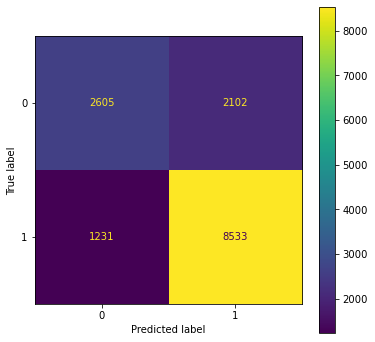

In [47]:
start_time = time.time()

# Here are the results of when we ran gridsearch with K-Fold CrossValidation (CV) = 5 with the below parameters
# {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# The Random Forrest Hyper Tuned Model with the best perameters accuracy = 76.55%
# Time taken to run cell in minutes:  199.45561063687006

# Create the parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 2, 5, 8, 10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

param_grid = {
    'n_estimators': [200], #The number of trees in the forest.
    'max_depth': [None], #The maximum depth of the tree, Here we have set it to None, which means that 
    #there is no maximum depth.
    'min_samples_split': [2], #The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1] #The minimum number of samples required to be at a leaf node.
}

# Create a random forest classifier
RF_HT = RandomForestClassifier()

# Set up the grid search
RF_HT = GridSearchCV(estimator=RF_HT, param_grid=param_grid, cv=2, n_jobs=-1)

# Fit the grid search to the data
RF_HT.fit(X_train, y_train)
model_score_RF_HT_tr = RF_HT.score(X_train, y_train)
print('The Random Forest Classifier Accuracy on Training data is:  {:.2f}%'.format((model_score_RF_HT_tr) * 100))

# Print the best hyperparameters found
print(RF_HT.best_params_)

#calculate the model score on test
y_predict_RF_HT = RF_HT.predict(X_test)
model_score_RF_HT_te = RF_HT.score(X_test, y_test)
print('The Random Forest Hyper Tuned Model Accuracy on Test data is:  {:.2f}%'.format((model_score_RF_HT_te) * 100))
print('The Random Forest Hyper Tuned Model Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict_RF_HT)*100))
print('The Random Forest Hyper Tuned Model Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict_RF_HT)*100))

cm = confusion_matrix(y_test, y_predict_RF_HT)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

end_time = time.time()
min_ht3a = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht3a)

HTResults3 = {'Results':'HT3', 'Model':'Random Forrest', 'Parameters':RF_HT.best_params_, 'test_accuracy':round(model_score_RF_HT_te,4), 'time':min_ht3a}
print(color.BOLD + str(HTResults3) + color.END)

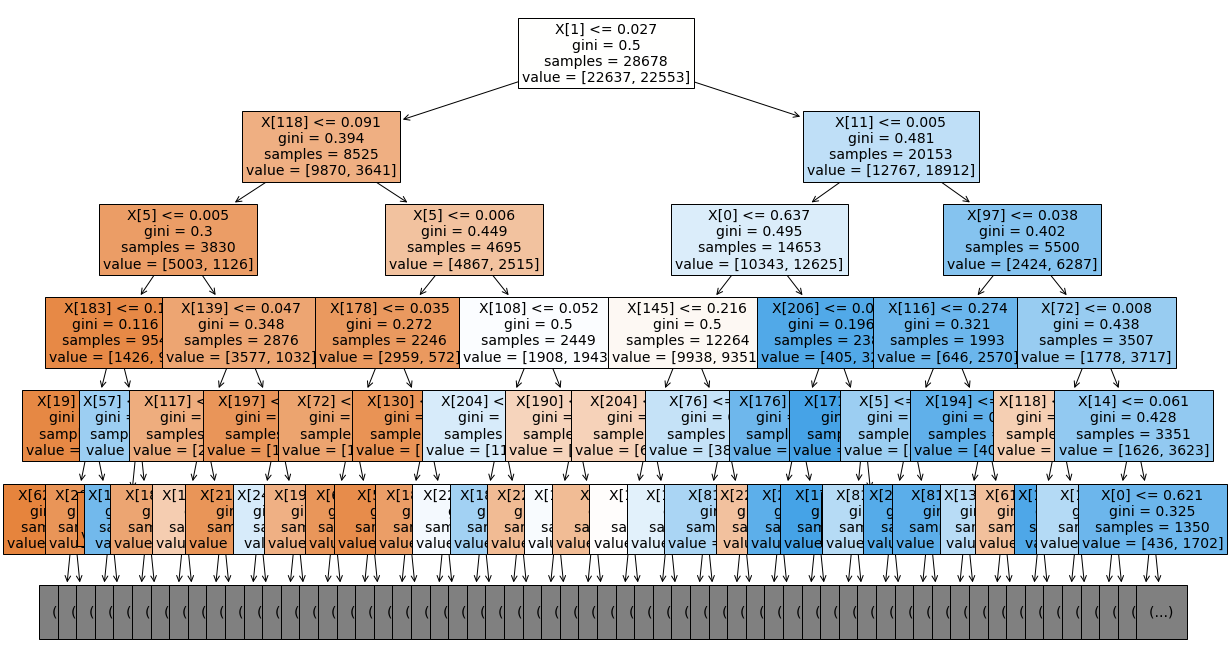

Time taken to run cell in minutes:  0.15


In [48]:
start_time = time.time()

# Print the decision tree
from sklearn.tree import plot_tree

# Extract the decision trees from the random forest
estimators = RF_HT.best_estimator_.estimators_

# Print the first decision tree
plt.figure(figsize=(20, 12))
plot_tree(estimators[0], filled=True, max_depth=5, fontsize=14)
plt.show()

end_time = time.time()
min_ht3b = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht3b)

In [49]:
start_time = time.time()

# Extract the feature importances from the random forest
importances = RF_HT.best_estimator_.feature_importances_

# Create a dataframe with feature importances
X_test = pd.DataFrame(X_test)
feature_importance_df = pd.DataFrame({"feature": X_test.columns, "importance": importances})

# Sort the feature importances
feature_importance_df.sort_values("importance", ascending=False, inplace=True)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features
print('Top 10 Features')
print(top_10_features)

end_time = time.time()
min_ht3c = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht3c)

Top 10 Features
                                               feature  importance
0                 yearly_sunlight_kwh_kw_threshold_avg    0.042249
1                                      count_qualified    0.023892
14                               yearly_sunlight_kwh_s    0.018318
5                                   number_of_panels_s    0.016097
19                           yearly_sunlight_kwh_total    0.015505
118          owner_occupied_housing_units_median_value    0.015326
117  owner_occupied_housing_units_lower_value_quartile    0.014932
16                               yearly_sunlight_kwh_w    0.014102
246                                           Perc_Dem    0.014092
119  owner_occupied_housing_units_upper_value_quartile    0.013338
Time taken to run cell in minutes:  0.0


### 3.13 Now we will use GridSearchCV using the XGBoost Model

The code is performing hyperparameter tuning for a XGBoost classifier using GridSearchCV.\
XGBoost (eXtreme Gradient Boosting) is a popular machine learning algorithm for solving classification and regression problems. It is an implementation of gradient boosting decision trees, which combines the predictions of several decision trees to produce a single, more accurate prediction. XGBoost is designed to be fast, scalable, and accurate.

The XGBoost Accuracy on Training data is:  82.24%
Best parameters:  {'colsample_bytree': 0.6, 'eval_metric': 'error', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.7}
Best score: 79.52%

The XGBoost Accuracy on Test data is:  79.52%
The XGBoost Recall on Test:  76.61%
The XGBoost Precision on Test:  87.36%

Time taken to run cell in minutes:  1.51
{'Results': 'HT4', 'Model': 'XGBoost', 'Parameters': {'colsample_bytree': 0.6, 'eval_metric': 'error', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.7}, 'test_accuracy': 0.7952, 'time': 1.51}


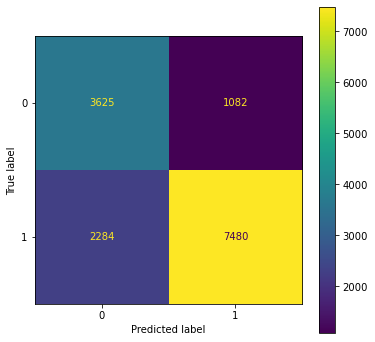

In [50]:
start_time = time.time()
from xgboost import XGBClassifier

# Here are the results of when we ran gridsearch with K-Fold CrossValidation (CV) = 5 with the below parameters
# Best parameters:  {'colsample_bytree': 0.6, 'eval_metric': 'error', 'learning_rate': 0.1, 'max_depth': 5, 
#'min_child_weight': 2, 'subsample': 0.7}
# Best score: 78.51%
# Time taken to run cell in minutes:  661.61, 11 hours.

#Create the parameter grid
# param_grid = {
#    'learning_rate': [0.1, 0.2, 0.3],
#    'max_depth': [3, 4, 5],
#    'min_child_weight': [1, 2, 3],
#    'subsample': [0.5, 0.6, 0.7],
#    'colsample_bytree': [0.5, 0.6, 0.7],
#    'eval_metric': ['error']
#}

#Create the parameter grid with the best parameters
param_grid = {
    'learning_rate': [0.1], #a float specifying the step size shrinkage used in the update to prevent overfitting.
    'max_depth': [5], #an integer specifying the maximum depth of a tree.
    'min_child_weight': [2], #an integer specifying the minimum sum of instance weight needed in a child.
    'subsample': [0.7], #a float specifying the subsample ratio of the training instances.
    'colsample_bytree': [0.6], #a float specifying the subsample ratio of columns when constructing each tree.
    'eval_metric': ['error'] #a string or a list of strings specifying the evaluation metrics for validation data 
    #that computes the classification error, which is the fraction of misclassified instances.
}

# Instantiate the XGBClassifier
clf_xgb_HT = XGBClassifier()

# Create the grid search
xgb_HT = GridSearchCV(clf_xgb_HT, param_grid, cv=2, n_jobs=-1)
#This means that the data will be split into two parts, and the model will be trained on one part and validated 
#on the other. 

# Fit the grid search to the data
xgb_HT.fit(X_train, y_train)
model_score_xgb_HT_tr = xgb_HT.score(X_train, y_train)
print('The XGBoost Accuracy on Training data is:  {:.2f}%'.format(model_score_xgb_HT_tr * 100))

expected_y  = y_test
predicted_y = xgb_HT.predict(X_test)

# Print the best parameters and the best score
print("Best parameters: ", xgb_HT.best_params_)
print("Best score: {:.2f}%".format(xgb_HT.best_score_ * 100))

print('')
model_xgb_HT_score_te = xgb_HT.score(X_test, y_test)
print('The XGBoost Accuracy on Test data is:  {:.2f}%'.format(xgb_HT.best_score_ * 100))
print('The XGBoost Recall on Test:  {:.2f}%'.format(recall_score(y_test, predicted_y)*100))
print('The XGBoost Precision on Test:  {:.2f}%'.format(precision_score(y_test, predicted_y)*100))

cm = confusion_matrix(y_test, predicted_y)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

print('')
end_time = time.time()
min_ht4a = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht4a)

HTResults4 = {'Results':'HT4', 'Model':'XGBoost', 'Parameters':xgb_HT.best_params_, 'test_accuracy':round(xgb_HT.best_score_,4), 'time':min_ht4a}
print(color.BOLD + str(HTResults4) + color.END)

In [51]:
start_time = time.time()

# Extract the feature importances from the XGB Grid Search Model
importances = xgb_HT.best_estimator_.feature_importances_

# Create a dataframe with feature importances
X_test = pd.DataFrame(X_test)
feature_importance_df = pd.DataFrame({"feature": X_test.columns, "importance": importances})

# Sort the feature importances
feature_importance_df.sort_values("importance", ascending=False, inplace=True)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features
print('Top 10 Features')
print(top_10_features)

print('')
end_time = time.time()
min_ht4b = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_ht4b)

Top 10 Features
                                               feature  importance
1                                      count_qualified    0.037766
14                               yearly_sunlight_kwh_s    0.033912
119  owner_occupied_housing_units_upper_value_quartile    0.033293
19                           yearly_sunlight_kwh_total    0.027705
0                 yearly_sunlight_kwh_kw_threshold_avg    0.023584
5                                   number_of_panels_s    0.019106
117  owner_occupied_housing_units_lower_value_quartile    0.017901
118          owner_occupied_housing_units_median_value    0.013757
12                                            kw_total    0.013112
246                                           Perc_Dem    0.011864

Time taken to run cell in minutes:  0.0


In [ ]:
print(HTResults1)
print(HTResults2)
print(HTResults3)
print(HTResults4)

***
<font color=blue font face = "WIldWest" size = "5">Summary of Results for the 4 Prefered Models using GridSearchCV to hypertune the models:<font>
***

1. In 5.1 min, the **Linear Discrimant Analysis (LDA)** with the gridsearch best parameters produced an accuracy score of **71.3%**
2. In 97.4 min, the **Nu-Support Vector Machine (NuSVC)** with the gridsearch best parameters produced an accuracy score of **74.3%**
3. In 5.4 min, the **Random Forrest Classifier** with the gridsearch best parameters produced an accuracy score of **77.0%**
4. In 1.5 min, the **XGBoost Model Classifier** with the gridsearch best parameters produced an accuracy score of **79.5%%**
<br>
<br>
    
**Supervised Learning GridSearch Hypertuning Conclustion:**  Using GridSearch to Hypertune some of the perameters was able to boost the performance of the XGBoost Model Classifier by ~2% where the other models (LDA, Random Forest, & NuSVC) only achieved a slight increase in performance thru hyptertuning.

Note that the following Times were needed to Run the GridSearch CV to find the best parameters for each of the above Models:
1. LDA - **4.7 min**
2. NuSCV - **177.1 min**
3. Random Forest - **199.5 min**
4. XGBoost - **661.61 min**

### 3.14 Random Forest with outliers capped

Now we will cap the outliers and to see how the Random Forrest performs with less noise due to this process.

<AxesSubplot:>

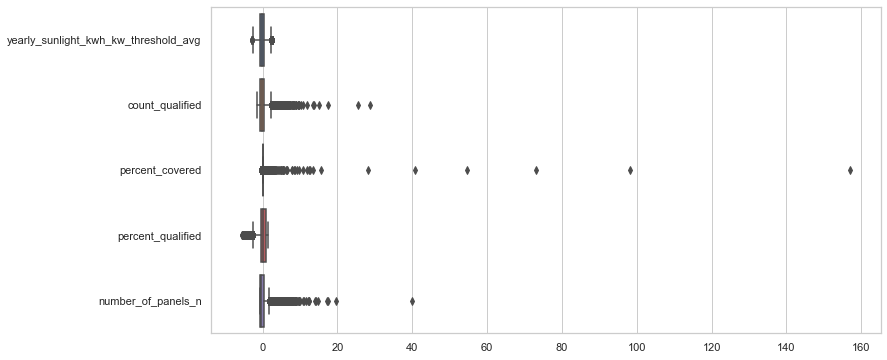

In [53]:
sc = StandardScaler() #used to standardize the data.
jd_scaled = pd.DataFrame(sc.fit_transform(jd_all),columns=jd_all.columns)

# use to set style of background of plot
sns.set(style="whitegrid")
 
# loading data-set
plt.figure(figsize=(12,6))
sns.boxplot(data = jd_scaled.T.head(5).T,orient="h")

The code below defines a function called cap_data that takes a pandas DataFrame df as input and performs a capping operation on each column in the DataFrame. The capping operation sets the values that fall outside of the 1st and 99th percentile to the corresponding percentile values. The function then returns a new pandas DataFrame called jd_scaled, which is assumed to be the standardized version of the input DataFrame.

capping is complete


<AxesSubplot:>

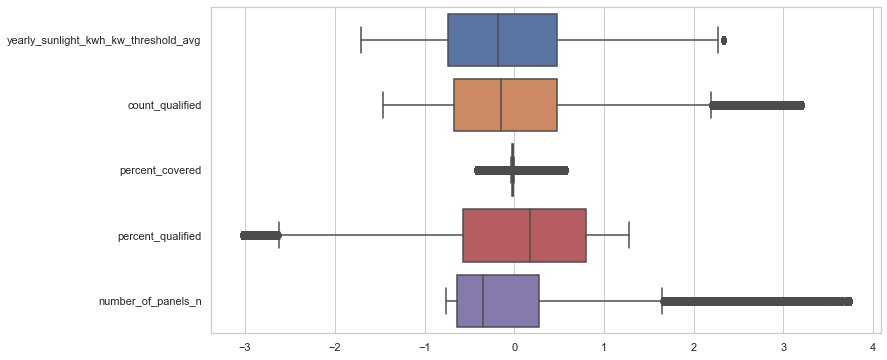

In [54]:
def cap_data(df):
    for col in df.columns:
        # print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    print("capping is complete")
    return jd_scaled

jd_scaled_and_capped=cap_data(jd_scaled)

# loading data-set
plt.figure(figsize=(12,6))
sns.boxplot(data = jd_scaled_and_capped.T.head(5).T,orient="h")

In [57]:
#This code is splitting the preprocessed data jd_scaled_and_capped into training and testing sets 
#using train_test_split function from scikit-learn.
X1 = jd_scaled_and_capped
X1 = X1.drop('current_solar_panel_installs', axis=1)  # Predictor feature columns
y1 = jd_all['current_solar_panel_installs']   # Predicted class (1=True, 0=False)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=99) # 1 is just any random seed number
X1_train.head(2)

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem
24066,0.203872,1.443801,-0.014706,1.248071,0.222394,1.847098,1.599493,2.054549,-0.465225,0.184817,...,0.390175,-0.319512,1.493891,0.203571,1.635868,2.247679,1.634252,1.812574,0.560010,-1.148827
41514,-0.181731,-0.244706,-0.013703,0.775604,0.644885,-0.008211,0.098007,-0.003965,-0.173198,0.323078,...,-1.109659,-1.220559,-0.827573,-0.644069,-0.214607,-0.147469,-0.215037,-0.183115,-0.371173,-1.148827


This code defines a scikit-learn pipeline for a Random Forest Classifier with hyperparameters specified in the params dictionary. The pipeline includes a StandardScaler() to standardize the features and a GridSearchCV object to perform a grid search over the hyperparameters.

The Random Forest Hyper Tuned Model Accuracy on Training data is:  100.00%
The Random Forest Hyper Tuned Model Accuracy on Test data is:  77.76%
The Random Forest Hyper Tuned Model Recall on Test:  88.28%
The Random Forest Hyper Tuned Model Precision on Test:  80.61%
Cross Validation accuracy scores: [0.77532283 0.7727165 ]
Cross Validation accuracy: 0.774 +/- 0.001
Time taken to run cell in minutes:  1.44
{'Results': 'HTLD1', 'Model': 'Random Forrest', 'Parameters': 'best parameters', 'test_accuracy': 0.7776, 'time': 1.44}


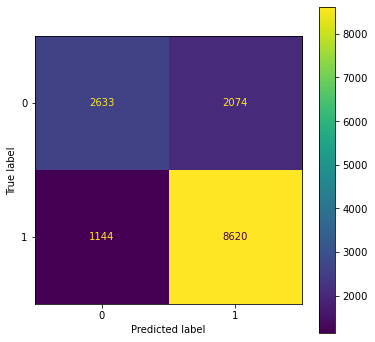

In [79]:
start_time = time.time()

params = {'n_estimators':[100], #The number of trees in the forest.
          'criterion':['gini'], #The function to measure the quality of a split.
          'max_depth': [None],#The maximum depth of the tree. If None, nodes are expanded until all the leaves contain less than min_samples_split samples.
          'min_samples_leaf': [1],#The minimum number of samples required to be at a leaf node.
          'min_samples_split':[2],#The minimum number of samples required to split an internal node.
          'max_features':['auto'],#The number of features to consider when looking for the best split.
          'random_state':[99] #The random seed to ensure reproducibility.
             }

#The GridSearchCV object performs a cross-validation over the specified hyperparameters, 
#using a 2-fold cross-validation (cv=2). The best hyperparameters are then used to refit the model (refit=True) 
#on the entire training dataset.
RF_pipeline = make_pipeline(StandardScaler(), 
                    GridSearchCV(RandomForestClassifier(),
                                 param_grid=params,
                                 cv=2,
                                 refit=True))#the best estimator found by GridSearchCV will be used to fit the data.


RF_HT_ld = RF_pipeline.fit(X1_train, y1_train)
model_score_RF_HT_ld_tr = RF_HT_ld.score(X1_train, y1_train)
print('The Random Forest Hyper Tuned Model Accuracy on Training data is:  {:.2f}%'.format((model_score_RF_HT_ld_tr) * 100))

#calculate the model score on test
y_predict_RF_HT_ld = RF_pipeline.predict(X1_test)
model_score_RF_HT_ld_te = RF_HT_ld.score(X1_test, y1_test)
print('The Random Forest Hyper Tuned Model Accuracy on Test data is:  {:.2f}%'.format((model_score_RF_HT_ld_te) * 100))
print('The Random Forest Hyper Tuned Model Recall on Test:  {:.2f}%'.format(recall_score(y1_test, y_predict_RF_HT_ld)*100))
print('The Random Forest Hyper Tuned Model Precision on Test:  {:.2f}%'.format(precision_score(y1_test, y_predict_RF_HT_ld)*100))

scores = cross_val_score(RF_pipeline, X=X1_train, y=y1_train, cv=2, n_jobs=1) #only one CPU core will be used for computation.


print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

sns.reset_orig()
cm = confusion_matrix(y1_test, y_predict_RF_HT_ld)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

HT_LDResults1 = {'Results':'HTLD1', 'Model':'Random Forrest', 'Parameters':'best parameters', 'test_accuracy':round(model_score_RF_HT_ld_te,4), 'time':min_htld1}
print(color.BOLD + str(HT_LDResults1) + color.END)

### 3.15 Random Forest with some of the most Important Features only.

Now we will try to reduce the number of input/predictor variables down to some of the most important few based on the previously ran Random Forest and XGBoost Models to see how one of the best 2 models, Random Forrest performs with fewer variables.  We will also use the pipeline functionality to standardize/normalize the data.

In [59]:
jd1 = jd_all[['yearly_sunlight_kwh_kw_threshold_avg',
                   'count_qualified',
                   'owner_occupied_housing_units_median_value',
                   'owner_occupied_housing_units_lower_value_quartile',
                   'yearly_sunlight_kwh_total',
                   'kw_total',
                   'owner_occupied_housing_units_upper_value_quartile',
                   'percent_covered',
                   'median_rent',
                   'number_of_panels_total',
                   'bachelors_degree_or_higher_25_64',
                   'Perc_Dem',
                   'children',
                   'yearly_sunlight_kwh_median',
                   'employed_manufacturing',
                   'dwellings_1_units_detached',
                   'current_solar_panel_installs'
    ]]

In [60]:
X1 = jd1
X1 = X1.drop('current_solar_panel_installs', axis=1)  # Predictor feature columns
y1 = jd1['current_solar_panel_installs']   # Predicted class (1=True, 0=False)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=99) # 1 is just any random seed number
X1_train.head(2)

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,owner_occupied_housing_units_median_value,owner_occupied_housing_units_lower_value_quartile,yearly_sunlight_kwh_total,kw_total,owner_occupied_housing_units_upper_value_quartile,percent_covered,median_rent,number_of_panels_total,bachelors_degree_or_higher_25_64,Perc_Dem,children,yearly_sunlight_kwh_median,employed_manufacturing,dwellings_1_units_detached
census_tract,,,,,,,,,,,,,,,,
48491020708,1117.75,2189,250800.0,196800.0,46757761.84,35583.5,297000.0,100.273100,1684.0,142334.0,2368.0,38,2261,18169.18621,746.0,2438
48201413000,1063.35,926,682500.0,535900.0,25994326.03,20878.5,971800.0,100.506073,1763.0,83514.0,1696.0,38,994,18990.23599,106.0,878


The Random Forest Hyper Tuned Model Accuracy on Training data is:  100.00%
The Random Forest Hyper Tuned Model Accuracy on Test data is:  77.76%
The Random Forest Hyper Tuned Model Recall on Test:  88.28%
The Random Forest Hyper Tuned Model Precision on Test:  80.61%
Cross Validation accuracy scores: [0.77532283 0.76667456]
Cross Validation accuracy: 0.771 +/- 0.004
Time taken to run cell in minutes:  3.06
{'Results': 'HTLD1', 'Model': 'Random Forrest', 'Parameters': 'best parameters', 'test_accuracy': 0.7776, 'time': 3.06}


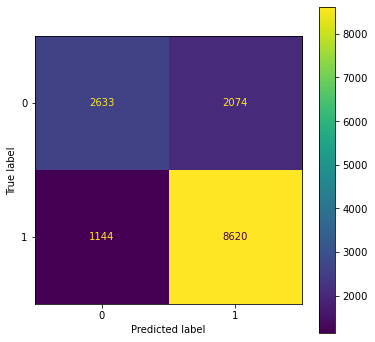

In [80]:
start_time = time.time()

params = {'n_estimators':[50, 100], #The number of trees in the forest.
          'criterion':['gini'], ##The function to measure the quality of a split. Two values will be used to build two separate models. 
          #Increasing the number of trees can improve the model's accuracy, but also increases the computation time.
          'max_depth': [None, 5, 10], #The maximum depth of the tree. Three values are specified, None, 5 and 10, 
          #which means that the trees can grow as deep as possible, or to a maximum depth of 5 or 10 levels. 
          #Limiting the depth of the trees can help prevent overfitting. 
          'min_samples_leaf': [1],#each leaf node must contain at least one sample.
          'min_samples_split':[2],#The minimum number of samples required to split an internal node. 
          #Here, only one value is specified, 2, which means that a node will only be split if it has at least 2 
          #samples. This parameter can also help prevent overfitting.
          'max_features':['auto'], #The number of features to consider when looking for the best split. 
          'random_state':[99]#The seed value for the random number generator,with 99 the same set of random 
          #numbers will be generated each time the code is run
             }
    
RF_pipeline = make_pipeline(StandardScaler(), 
                    GridSearchCV(RandomForestClassifier(),
                                 param_grid=params,
                                 cv=2,
                                 refit=True)) #the best estimator found by GridSearchCV will be used to fit the data.

RF_HT_ld = RF_pipeline.fit(X1_train, y1_train)
model_score_RF_HT_ld_tr = RF_HT_ld.score(X1_train, y1_train)
print('The Random Forest Hyper Tuned Model Accuracy on Training data is:  {:.2f}%'.format((model_score_RF_HT_ld_tr) * 100))

#calculate the model score on test
y_predict_RF_HT_ld = RF_pipeline.predict(X1_test)
model_score_RF_HT_ld_te = RF_HT_ld.score(X1_test, y1_test)
print('The Random Forest Hyper Tuned Model Accuracy on Test data is:  {:.2f}%'.format((model_score_RF_HT_ld_te) * 100))
print('The Random Forest Hyper Tuned Model Recall on Test:  {:.2f}%'.format(recall_score(y1_test, y_predict_RF_HT_ld)*100))
print('The Random Forest Hyper Tuned Model Precision on Test:  {:.2f}%'.format(precision_score(y1_test, y_predict_RF_HT_ld)*100))

scores = cross_val_score(RF_pipeline, X=X1_train, y=y1_train, cv=2, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


cm = confusion_matrix(y1_test, y_predict_RF_HT_ld)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

HT_LDResults1 = {'Results':'HTLD1', 'Model':'Random Forrest', 'Parameters':'best parameters', 'test_accuracy':round(model_score_RF_HT_ld_te,4), 'time':min_htld1}
print(color.BOLD + str(HT_LDResults1) + color.END)


<font color=blue font face = "Verdana" size = "4">
    <center><b>4. Unsupervised Learning Data Analysis</b>

<font color=blue font face = "Verdana" size = "3">Unsupervised learning is a type of machine learning where the model is trained on a dataset without any labeled target variable. The goal of unsupervised learning is to discover the underlying structure or patterns in the data and learn to represent it in a meaningful way. Unsupervised learning is used when we have little or no prior knowledge about the data and we want to explore it and find interesting relationships or clusters.

<font color=blue font face = "Verdana" size = "3">The two main types of unsupervised learning are clustering and dimensionality reduction. Clustering is the task of grouping similar data points together into clusters or groups, based on their similarity or distance in the feature space. Dimensionality reduction is the task of reducing the number of features or variables in the data, while preserving the most important information or structure. This can help to simplify the data and make it easier to visualize or analyze.
    
<font color=blue font face = "Verdana" size = "3">Now we will use unsupervised learning to analyze the data in order to explore the data and see if we can find meaningful patterns and groupings inherent in data we will also use PCA ANalysis to reduce the dimensions of our dataset which is essential performiong Cluster Analysis (CA).

### 4.1 Running PCA Analysis & FAMD

Principal Component Analysis (PCA) is a tool used to summarize and to visualize the information in a dataset containing statistical units described by multiple correlated quantitative variables. Each variable could be considered as a dimension. With PCA is possible to extract the underlying information of a multi-dimensional dataset by means of new variables called Principal Components that help to reduce the dimensionality of the dataset preserving the most relevant characteristics.
Our dataset has only numerical variables, so PCA can be performed on all of the data. When dealing with a mixture of variables, an approach that can be consider is the Factor Analysis of Mixed Data (FAMD). Roughly speaking, FAMD works as a PCA for quantitative variables and as a Multiple Correspondance Analysis (MCA) for categorical variables.  To test how FAMD works we changed our target variable to a categorical variable.

### First of all we perform PCA than we’ll look at FAMD.
To select the best number of principal components there are different methods that can be adopted,
such as the elbow method visualizable with a screen plot (in which the goal is to identify the presence
of possible elbows in the graph) or the Kaiser’s rule (where we should opt for the number of PCs
where the eigenvalues are greater than 1.\
**PCA Scree Plot**

Before applying PCA, the code standardizes the data using the "StandardScaler()" function from scikit-learn. This is a common preprocessing step for PCA as it scales the variables to have mean zero and unit variance, which can improve the performance of the algorithm.

Next, the code creates a PCA object with 10 components, and applies it to the standardized data using the "fit_transform()" method. The resulting transformed data is stored in a new variable called "pca_performed".

Then, the code creates a plot of the "screen plot", which shows the proportion of variance explained by each principal component. This plot can help to determine the optimal number of principal components to retain for further analysis.

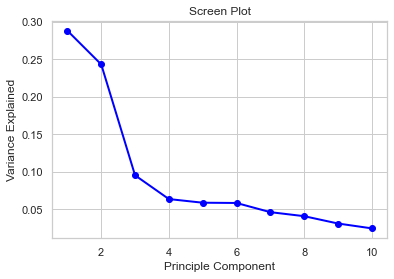

Time taken to run cell in minutes:  0.01


In [62]:
start_time = time.time()

unsupervised_df = jd1.copy() #copying to dataframe.

unsupervised_df = StandardScaler().fit_transform(unsupervised_df)#standardizes the data scaling the variables 
#to have mean zero and unit variance, which can improve the performance of the algorithm.
pca = PCA(n_components=10) #creates a PCA object with 10 components.
pca_performed = pca.fit_transform(unsupervised_df)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2,
        color='blue')
plt.title('Screen Plot')#This plot can help to determine the optimal number of principal components.
plt.xlabel('Principle Component')
plt.ylabel('Variance Explained')
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

As imaginated, the variance explained by the components is not so high. The screen plot suggests
that an optimal number of components may be 4.

### PCA Plot showing data relationship with the First Two PCAs

This code is creating a scatter plot of the first two principal components generated in the previous code block, using the Seaborn "lmplot" function. 

The plot shows the relationship between the two principal components, colored by the "current_solar_panel_installs" variable.

Before creating the plot, the code converts the "current_solar_panel_installs" variable from numeric to string data type using the "astype()" method. This because the variable is being used as a categorical variable for plotting purposes.

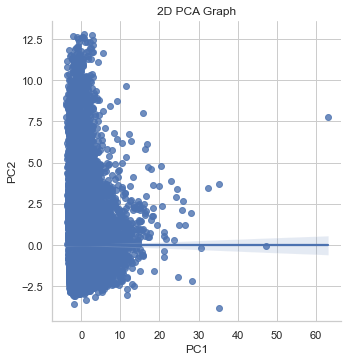

Time taken to run cell in minutes:  0.16


In [63]:
start_time = time.time()

jd_all["current_solar_panel_installs"]= jd_all["current_solar_panel_installs"].astype(str)

pca_df = pd.DataFrame(data = pca_performed[:, :2], columns = ['PC1', 'PC2']) #creates a new dataframe which contains 
#the first two principal components as columns.
pca_visual = pd.concat([pca_df, jd1['current_solar_panel_installs']], axis = 1) #concatenates this dataframe with 
#the target variable.
sns.lmplot( #create the scatter plot and points colored according to the "current_solar_panel_installs" variable.
    x='PC1',
    y='PC2',
    data=pca_visual,
    palette = 'Blues',
    fit_reg=True, #include a linear regression line in the plot
    legend=True #set to True to include a legend
    )

plt.title('2D PCA Graph') #plot title and display
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

Kaiser's Rule
Note: In this case, following the idea of choosing the components that have eigenvalues > 1, the number
of suggested PCs is 4, because they are sufficient to explain a significant portion of the total variance in the data, while the remaining components are less important in terms of explaining the structure of the data.

An eigenvalue greater than 1 is often used as a criterion for determining the number of principal components to retain in PCA. Retaining only principal components with eigenvalues greater than 1 is called the Kaiser-Guttman rule, and it is based on the idea that principal components with eigenvalues less than 1 explain less variance than a single original variable, and therefore are not worth retaining.

In [64]:
# Printing the eigenvalues
print(pca.explained_variance_)

[4.90383092 4.13784045 1.61955788 1.08028411 0.99728799 0.99139348
 0.78280077 0.69161619 0.52505306 0.4146467 ]


The first principal component (PC1) has an eigenvalue of 4.9038, the second principal component (PC2) has an eigenvalue of 4.1378, and so on.\
The higher the eigenvalue, the more important the principal component is in explaining the structure of the data.\
We can see that the first two principal components (PC1 and PC2) have relatively high eigenvalues compared to the rest, indicating that they explain a substantial portion of the total variance in the data. This suggests that these two components may be important for understanding the underlying structure of the data, while the remaining components may be less important.

### Scatterplot of First 3 PCAs

This code creates a 3D scatter plot of the first three principal components obtained from the PCA analysis, using the "mpl_toolkits.mplot3d" module in matplotlib.

The resulting plot shows the distribution of data points in three-dimensional space, with the position of each point determined by its values along the first three principal components. The plot can be useful for visualizing the relationships between variables in a high-dimensional dataset.

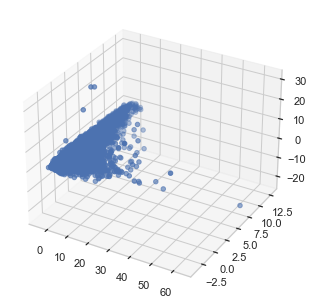

Time taken to run cell in minutes:  0.03


In [65]:
start_time = time.time()

fig = pylab.figure() #this function creates a new figure object, used to hold the plot.
ax = Axes3D(fig, auto_add_to_figure=False) #to create a 3D plot axis object
#auto_add_to_figure = False because otherwise it gives a warning.
pca_df = pd.DataFrame(data = pca_performed[:, :3], columns = ['PC1', 'PC2', 'PC3'])
pca_visual = pd.concat([pca_df, jd1['current_solar_panel_installs']], axis = 1)
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3) #PCA results are then plotted using the "scatter" method 
#of the axis object.
fig.add_axes(ax)
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

### 4.2 FAMD
This code performs Factor analysis of mixed data (FAMD) (on the "jd_all" dataset using the "prince" library).
Given we have all numerical variables and we are just setting our target variable to be categorical, we do not expect to see improvements using FAMD but wanted to give it a try.
Note: in FAMD rescaling of quantitative variables is performed automatically.

Time taken to run cell in minutes:  0.46


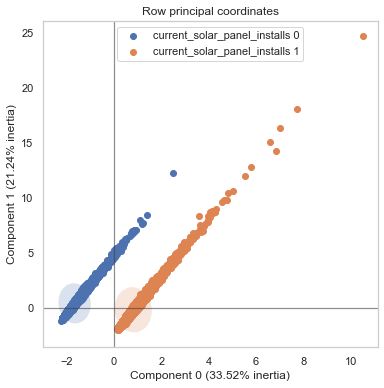

In [66]:
start_time = time.time()

jd2 = jd_all.copy() #a new dataframe is created onverting the "current_solar_panel_installs" column to
#a string datatype.
jd2["current_solar_panel_installs"]= jd2["current_solar_panel_installs"].astype(str)

famd = FAMD(
    n_components=2, 
    n_iter=3, #the number of iterations used for computing the Singualar Value Decomposition SVD, a process to perform dimensionality reduction
    copy=True, #if False then the computations will be done in place which can have possible side-effects on the input data
    check_input=True,
    engine='auto', #what SVD engine to use
    random_state=42 #set a seed to control the randomnes of the SVD results
)

famd = famd.fit(jd2) #to fit the model to the input data.

#generate a scatter plot of the row coordinates using the "plot_row_coordinates" method.
ax = famd.plot_row_coordinates(
jd2, #the input data
ax=None,
figsize=(6, 6),
x_component=0,
y_component=1,
#the labels to use for the color-coding of each point ("color_labels").
color_labels=['current_solar_panel_installs {}'.format(t) for t in jd2['current_solar_panel_installs']],
ellipse_outline=False,
ellipse_fill=True,
show_points=True,
)

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

The plot can be useful for visualizing the relationships between variables in a high-dimensional mixed data set, but it became apparent to us that we just created out own 2 clusters automatically by forcing our target variable in as a categorical variable.

### 4.3 K-Means Clustering
K-means clustering is the most used partitioning clustering algorithm. It classifies the n units to the
K clusters such that units within the same cluster are as similar as possible (high cluster cohesion),
where units from different clusters are as dissimilar as possible (high cluster separation). K-means
uses Euclidean distance.   Let’s see which is the optimal number of clusters using the silhouette method.

The Silhouette score measures how similar an object is to its own cluster compared to other clusters. The higher the Silhouette score, the better-defined the clusters are.
This is a common approach to finding the optimal number of clusters.

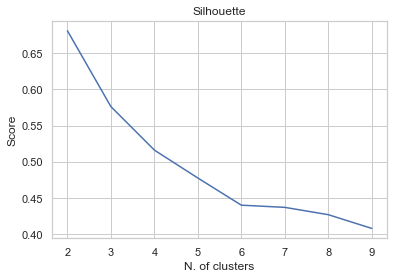

Time taken to run cell in minutes:  35.96


In [67]:
start_time = time.time()

sc = []
for i in range (2, 10): #ran the KMeans algorithm for different numbers of clusters,ranging from 2 to 9.
    kmeans = KMeans(n_clusters=i, init= 'k-means++', n_init = 2, max_iter=30, random_state=1)
    kmeans.fit(jd_all)
    label = kmeans.predict(jd_all)
    score = silhouette_score(jd_all, label)
    sc.append(score)
    
"""
k-means++: selects initial cluster centroids using sampling based on an empirical probability
distribution of the points contribution to the overall inertia.

n_init = 2: is Number of times the k-means algorithm is run with different centroid seeds. 

max_iter=30: Maximum number of iterations of the k-means algorithm for a single run.

random_state=1: the results of the algorithm are reproducible.
"""
    
plt.plot(range(2,10), sc)
plt.title("Silhouette")
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

The optimal number of clusters is 6, where you see the bend in the curve. Now let's visualize our results.

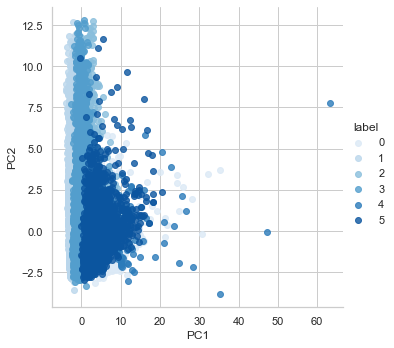

Time taken to run cell in minutes:  0.15


In [68]:
start_time = time.time()

kmeans = KMeans(n_clusters=6, init= 'k-means++', n_init = 2, max_iter= 30, random_state=1)
kmeans.fit(jd_all)
label = pd.Series(kmeans.predict(jd_all))
pca_visual2 = pd.concat([pca_df, label], axis = 1)
pca_visual2.rename(columns= {0: 'label'}, inplace = True)
sns.lmplot(
x='PC1',
y='PC2',
data=pca_visual2,
hue='label',
palette = "Blues",
fit_reg=False, #avoid to plot a regression model relating the variables
legend=True
)
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

### 4.4 K-Modes Clustering

Kmodes is an extension of the kmeans method in which it’s possible to consider not only quantitative variables but also qualitative ones. The modifications done in the k-means are:
* using a simple matching dissimilarity measure for categorical objects
* replacing means of clusters by modes
* using a frequency-based method to update the modes

This code generates a scree plot for KModes clustering algorithm. The scree plot is a line graph of the clusters (x-axis) against the cost function (y-axis). The cost function measures the total dissimilarity between the data points and their assigned clusters.

In this code, the KModes algorithm is run for different values of k (the number of clusters).\
The optimal number of clusters is typically the value at the "elbow" of the graph, where increasing the number of clusters no longer significantly reduces the cost function.

Time taken to run cell in minutes:  140.02


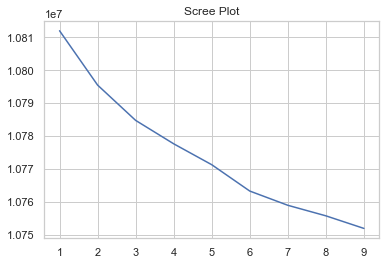

In [69]:
start_time = time.time()

#jd3 = jd1.copy()
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, max_iter = 2)
    #num_clusters: the number of clusters that the algorithm will form, from 1 to 9 in the for loop that follows.
    #init = "Cao": The method used for initialization of the centroids. Here, "Cao" method is used. 
    #n_init = 1: The number of time the algorithm will be run with different centroid seeds. Here, it is set to 1.
    #max_iter = 2: The maximum number of iterations of the algorithm for a single run. Here, it is set to 2.
    kmode.fit_predict(jd_all)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,10,1)])
plt.title("Scree Plot")
plt.plot(y,cost)

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

#### The Kmodes does not do a good job of easily isolating the best number of clusters in our data, it might be 6 but based on the plot it is very hard to tell. 
#### Since it was hard to tell the optimal number of clusters we will choose 4 and run the fitclusters to show how the dataset is now seperated into 4 clusters using the 'Cao' initialization method.

In [70]:
jd_all=jd_all.dropna() #drop any missing values.
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, max_iter = 2) #initialize the k-modes algorithm.

#init = "Cao": The method used for initialization of the centroids. Here, "Cao" method is used. 
#n_init = 1: The number of time the algorithm will be run with different centroid seeds. Here, it is set to 1.
#max_iter = 2: The maximum number of iterations of the algorithm for a single run. Here, it is set to 2.

#fit the clusters to the data and obtain the labels of each instance
fitClusters_cao = km_cao.fit(jd_all)
labels = fitClusters_cao.labels_
jd_all["labels"] = labels
jd_all["labels"] = jd_all["labels"].map({0:"First", 1:"Second", 2:"Third", 3:"Fourth"})
jd_all["labels"] = jd_all["labels"].astype("category")
jd_all["labels"].cat.reorder_categories(["First", "Second", "Third", "Fourth"])
list_col = ['labels']
cols = [col for col in jd_all if col not in list_col] 
#way to remove a variable from the dataframe we want to visualize
index = ['First Cluster', 'Second Cluster', 'Third Cluster', 'Fourth Cluster'] #'Third Cluster', 'Fourth Cluster'
pd.DataFrame (fitClusters_cao.cluster_centroids_[:, 0:248], columns = cols, index = index)

,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,occupation_production_transportation_material,occupation_sales_office,occupation_services,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,Perc_Dem,current_solar_panel_installs
First Cluster,1405.05,1,100.0,100.0,0,0,0,0,0,50.0,...,0.0,547.0,201.0,0,0,0,656,167,51,1
Second Cluster,1365.1,868,100.0,100.0,0,0,0,0,0,29.0,...,154.0,407.0,343.0,165,196,158,878,184,38,1
Third Cluster,1135.6,1,100.0,100.0,0,0,0,0,0,52.0,...,224.0,417.0,326.0,111,150,187,880,146,42,1
Fourth Cluster,973.25,690,100.0,100.0,0,10576,1174,0,0,20.0,...,280.0,256.0,267.0,136,131,106,914,125,38,1


#### Above are shown just the centroids according to kmodes. They represent the “central” point of our clusters (so they are the point consisting of the mode of each feature inside each cluster).

### 4.5 Hiearchial Cluster

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. There are two different approaches: 
* Agglomerative: start with the points as individual clusters, then at each step merge the closest pair of clusters until only one cluster (or k clusters) is left.
* Divisive: start with one all-inclusive cluster, then at each step split a cluster until each cluster contains a point (or there are k clusters)\

We are going to perform agglomerative clustering on a standardized dataset using the Ward method, and produces a dendrogram plot with a red line indicating a cutoff threshold for the distance measure. The dendrogram plot can be used to visually identify clusters in the data based on the distances between samples.

Time taken to run cell in minutes:  9.16


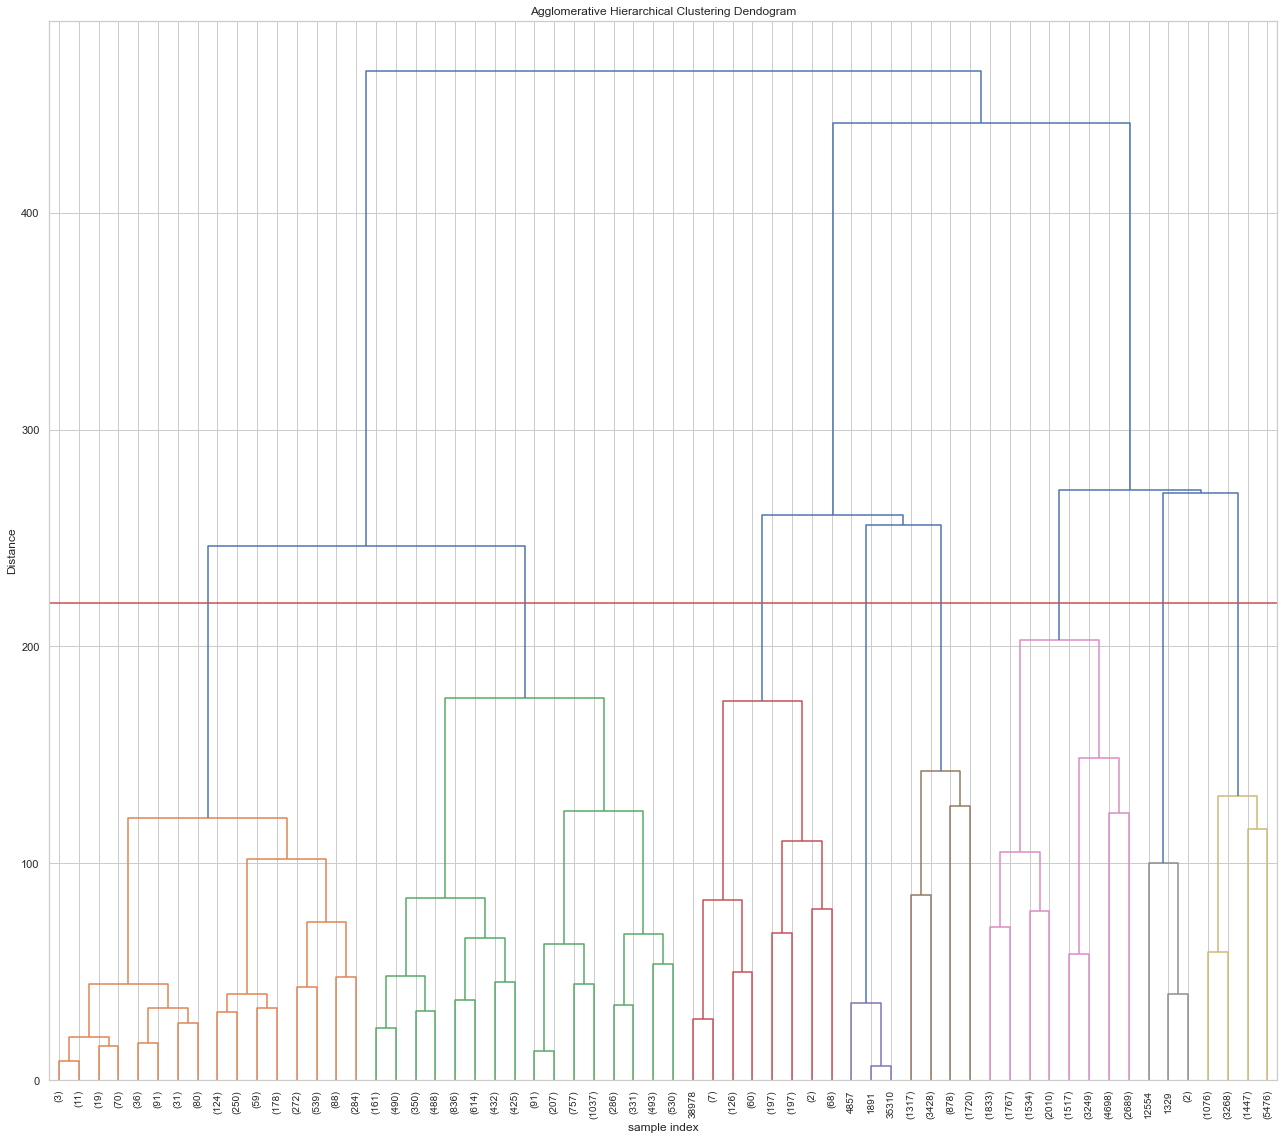

In [71]:
start_time = time.time()

from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(jd1),columns=jd1.columns)

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=220,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

#ward is the method through which we apply the␣
#agglomerative clustering (metric = euclidean is the deafult),
#color_threshold = 240 to say that above that value the lines need to have␣
#the same color
plt.axhline(y = 220, color = 'r', linestyle = '-')


end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

#### In the dendrogram we have to locate the largest vertical difference between nodes. The number of vertical lines intersecting this horizontal line is the optimal number of clusters. In our case, the largest vertical distance between nodes leads us with the result of k = 3 clusters.

#### To conlcude this part of our analysis, we want to visualize the clusters in the PCA space through a scatterplot using 3 clusters.

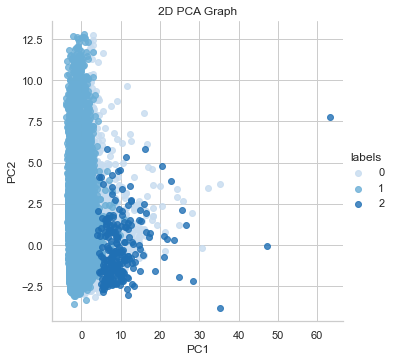

Time taken to run cell in minutes:  15.18


In [72]:
start_time = time.time()

aggl_cluster = AgglomerativeClustering(n_clusters = 3, linkage = "ward")
# linkage = "ward": minimizes the variance of the clusters being merged, 
#and it tends to produce clusters of relatively equal size.
cluster = aggl_cluster.fit(joined_data)
labels = cluster.labels_
pca_df = pd.DataFrame(data = pca_performed[:, :2], columns = ['PC1', 'PC2'])
pca_df["labels"] = labels
sns.lmplot(
x='PC1',
y='PC2',
data=pca_df,
hue='labels',
palette = "Blues",
fit_reg=False,
legend=True
)
plt.title('2D PCA Graph')
plt.show()

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

### Unsupervised Summary - The various clustering methods we were able to identify from 3 - 6 optimal clusters in our dataset based on the model being used.

<font color=blue font face = "Verdana" size = "4">
    <center><b>5. Semi-Supervised Learning</b>

<font color=blue font face = "Verdana" size = "3">Semi-Supervised Learning is an approach that lies between the Supervised and the Unsupervised Learning. It is a technique that use a small proportion of labelled data with an high proportion of
unlabelled data to make predictions. The starting points are the labelled data, thorugh which the
algorithm recognizes pattern and works on labelling also the unlabelled data.

### 5.1 Semi-Supervised Learning - Self Training

One of the most relevant Semi-Supervised algorithm is called “Self-trainig”. The workflow is:
* Pick a small amount of labeled data, and you use this dataset to train a model with a
supervised method.
* Perform pseudo-labelling, i.e. use the model partially trained to make predictions for the rest
of the dataset.
* Take the most confident predictions made with the model by setting a confidence threshold
and label data for which the confidence of the prediction is higher than the threshold.
* Add the new labelled data to the dataframe and train again the model (generally you can set
10 as max iterations).
* In the end, when you have a solid model trained on lot of data, you can test your model on
the test set.
Even though semi-supervised learning is an intresting machine learning method, there is no guarantee
that the performances can increase compared to standard supervised methods, since it relies a lot on the data we have.

We split the dataset as follows:
* Training set labelled -> 10% of data
* Training set unlabelled -> 70% of data
* Test set (labelled) -> 20% of data

In [76]:
start_time = time.time()

df_final_semisup = pd.concat([X2, y2], axis = 1)
df_final_semisup = df_final_semisup.sample(frac=1).reset_index(drop=True) #frac = 1 specifies the fraction of rows to 
# return (so =1 means all the rows), reset_index(drop=True) reset also the original indices to reflex the new order

train_ind = round(len(df_final_semisup)*0.10)
train_ind_unlab = train_ind + round(len(df_final_semisup)*0.70)
test_ind = train_ind_unlab + round(len(df_final_semisup)*0.20)

train_semisup = df_final_semisup[:train_ind]
train_semisup_unlab = df_final_semisup[train_ind:train_ind_unlab]
test_semisup = df_final_semisup[train_ind_unlab:]

x_train_semisup = train_semisup.iloc[:, :247] #take all the elements except the target
y_train_semisup = train_semisup.iloc[:, -1] #save the target

#oversampling of training labelled data
oversample = RandomOverSampler(sampling_strategy='minority') #it means that we ↪want to increase the class 
# with lower values to reach the number of values of the other class

x_train_semisup, y_train_semisup = oversample.fit_resample(x_train_semisup, y_train_semisup) #performing the oversampling

x_train_semisup_unlab = train_semisup_unlab.iloc[:, :247] #take all the elements except the target

x_test_semisup = test_semisup.iloc[:, :247] #take all the elements except the target
y_test_semisup = test_semisup.iloc[: , -1] #save the target

print("X_training labelled data shape: ", x_train_semisup.shape)
print("Y_training labelled data shape: ", y_train_semisup.shape)
print("Training unlabelled data shape: ", x_train_semisup_unlab.shape)
print("X_test data: ", x_test_semisup.shape)
print("Y_test data: ", y_test_semisup.shape)

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

X_training labelled data shape:  (6454, 247)
Y_training labelled data shape:  (6454,)
Training unlabelled data shape:  (33764, 247)
X_test data:  (9647, 247)
Y_test data:  (9647,)
Time taken to run cell in minutes:  0.01


#### The code has successfully split the data into labeled and unlabeled sets for semi-supervised learning, and performed oversampling on the labeled training data to address class imbalance.

### 5.2 Logistic Regression with semi-supervised method

We decided to apply logistic regression as supervised algorithm and to iterate maximum 5 times the process of labelling data e training again beacuse of limitations of the hardware used.

The best parameters with GridSearchCV are:  {'C': 1, 'solver': 'liblinear'}
1812 predictions have been added to training data
26278 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 1, 'solver': 'liblinear'}
983 predictions have been added to training data
25295 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 5, 'solver': 'liblinear'}
1599 predictions have been added to training data
23696 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 5, 'solver': 'liblinear'}
818 predictions have been added to training data
22878 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 10, 'solver': 'liblinear'}
980 predictions have been added to training data
21898 unlabelled data remained
----------------------------
The Best Logistic Regression Accuracy on Test:  71.78%
The Best Logistic

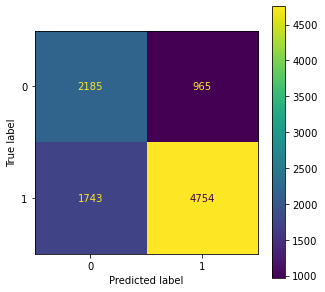

In [83]:
start_time = time.time()

i=0 #to check the number of iteration
while True: 
    
    #perform logistic regression
    grid = {
    'C': [1,5,10,100], 
    #C is referred to the concept of regularization,smaller value means stronger regularization.
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'] # ['newton-cg', 'liblinear', 'sag', 'saga'] Algorithm to use in the optimization problem
    }
    
    logreg_cv_semisup = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv=2, n_jobs=-1) #cv= 5 enable stratified 
    # k-fold cross validation with k=5
    
    logreg_cv_semisup.fit(x_train_semisup, y_train_semisup) #fit of the model with the optimal parameters on the training data
    
    print("The best parameters with GridSearchCV are: ", logreg_cv_semisup.best_params_)
    
    y_pred_unlab = logreg_cv_semisup.predict(x_train_semisup_unlab)
    probs0_1 = logreg_cv_semisup.predict_proba(x_train_semisup_unlab)
    df_probs = pd.DataFrame(probs0_1, columns = ["prob0", "prob1"])
    df_probs["predictions"] = y_pred_unlab
    df_probs.index = x_train_semisup_unlab.index
    
    #Putting rows in which there are predictions that have probability >99% in a list called high_prob
    high_prob = pd.concat([df_probs.loc[df_probs["prob0"]>0.90], df_probs.loc[df_probs["prob1"]>0.90]], axis = 0)
    #concat rows where, considering row by row, one of the two outputs has probability > 99%
    
    #concatenate x_train_semisup and y_train_semisup with the new rows from x_train_semisup_unlab and y_train_semisup that now have the label
    x_train_semisup = pd.concat([x_train_semisup, x_train_semisup_unlab.loc[high_prob.index]], axis = 0)
    y_train_semisup = pd.concat([y_train_semisup, high_prob.predictions])
    
    #drop the rows that are no more unlabelled (so they don't have to stay anymore in the unlabelled dataset)
    x_train_semisup_unlab = x_train_semisup_unlab.drop(index = high_prob.index)
    
    print(f"{len(high_prob)} predictions have been added to training data") #f-string way to print
    print(f"{len(x_train_semisup_unlab)} unlabelled data remained")
    print("----------------------------")
    
    i+=1
    
    if (len(high_prob) == 0): #if all the unlabelled data have been made labelled
        break
    elif i==5: #if we have iterated 5 times the dataset
        break
        
#Outside the while cicle
#Once we have trained our model with labelled and unlabelled data (that during the training became labelled), we test it on the test set

# predict on test
y_predict = logreg_cv_semisup.predict(X_test)
model_score_lr = logreg_cv_semisup.score(X_test, y_test)
print('The Best Logistic Regression Accuracy on Test:  {:.2f}%'.format((model_score_lr) * 100))
print('The Best Logistic Regression Recall on Test:  {:.2f}%'.format(recall_score(y_test, y_predict)*100))
print('The Best Logistic Regression Precision on Test:  {:.2f}%'.format(precision_score(y_test, y_predict)*100))

y_pred = logreg_cv_semisup.predict(x_test_semisup) #testing the model on the test data

cm = confusion_matrix(y_test_semisup, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
logreg_acc_semisup = accuracy_score(y_test_semisup, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test_semisup, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test_semisup, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test_semisup, y_pred))

end_time = time.time()
min_htld1 = round(((end_time - start_time)/60),2)
print("Time taken to run cell in minutes: ", min_htld1)

#### As we can see, the results obtained are not much better than when we ran the logistic regression model under the supervised learning and it does not come close to the more sophisticated supervised approaches such as xgboost or random forest results under supervised learning.

<font color=blue font face = "Verdana" size = "4">
    <center><b>6. Conclusion</b>

#### To conclude our analysis, we can point out some interesting considerations.

* It was interesting to be able to combine data from 3 seperate and very different datasets in order to help develop an classification prediction model.
* We used a fairly large set of data that we analyzed with over 250 input variables and 50,000 plus records.
* The models realized showed a relevant ability in predicting overall our target with the classical models achieving around 70% accuracy and the more sophisticated models achieving better than 75% accuracy.
* The best model from an accuracy perspective was the HypetTuned XGBoost Model which achieved a 79.5% accuracy.
* All models achieved higher precision scores than accuracy or recall.
* In order to improve our results we could consider new algorithms to train or perform more data cleaning and pre-processing operations.
* In terms of unsupervised analysis, our dataset resulted highly complex to be simplified through operation of dimensionality reduction. Moreover, cluster analysis showed that we can highlight 3 or 6 clusters (according to the method adopted) and we performed an analysis with both. 
* The semi-supervised learning results did not show any significant results improvement but was an interesting exercise to complete.

In [78]:
Full_WB_end_time = time.time()
print("Time taken to run the ENTIRE WORKBOOK in minutes: ", (Full_WB_end_time - Full_WB_start_time)/60)

Time taken to run the ENTIRE WORKBOOK in minutes:  476.4585192044576
